# **Laboratorio 2**
## Integrantes
- Johan Camilo Suarez Sinisterra - Estudiante 1
- Santiago Gomez Ordoñez - Estudiante 2
- Sebastian Martinez Arias - Estudiante 3

# **Carga de datos y descarga de librerias**

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.discriminant_analysis import StandardScaler
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.model_selection import KFold
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors



df = pd.read_csv('Datos_SenecaféAlpes.csv', sep=';')


# **Exploración del dataset**

Empezamos la exploración de datos viendo los valores del head de nuestro dataset, con el fin de conocer algunos datos pertenecientes y poder ver inconsistencias, nulos, diferencias entre semantica de valores etc. Posteriormente, cargamos las dimenciones de nuestro dataset con el fin de conocer cuanta cantidad de informaci+on hay en este y pasamos a ver de que tipos son las variables que vamos a estudias. Por ultimo hacemos un .describe con e fin de ver un resumen estadistico de columnas numericas del dataset.

In [42]:
display(df.head())
print("Dimensiones:", df.shape)
display(df.dtypes)
display(df.describe())

,ID,Area,Perimetro,LongitudEjeMayor,LongitudEjeMenor,RelacionAspecto,Excentricidad,AreaConvexa,DiametroEquivalente,Medida,Solidez,Redondez,Compacidad,FactorForma1,FactorForma2,FactorForma3,FactorForma4,DefectoVisible,MétodoSecado
0,G006149,50836,923618.0,358.515147,181.388899,alargado,NaN,NaN,254.413847,0.804762,0.983840,0.748853,0.709632,0.007052,0.001103,0.503578,0.995321,Normal,Lavado
1,G007234,62764,1003767.0,409.207082,198.330199,Alargado,NaN,64158.0,282.689948,0.703995,0.978272,0.782807,0.690824,0.006520,0.000916,0.477237,0.984666,NaN,Natural
2,G007054,59965,994266.0,389.088529,197.967275,Alargado,0.860886,60910.0,276.314692,0.661581,0.984485,0.762259,0.710159,0.006489,0.001018,0.504326,0.991211,Normal,Natural
3,G006619,55035,917.6,379.346822,185.390577,Alargado,0.872446,55591.0,NaN,0.799695,0.989998,0.821376,0.697811,0.006893,0.001008,0.486941,0.996380,Normal,Lavado
4,G013353,39324,737773.0,262.520242,191.176858,Alargado,0.685326,39758.0,223.760747,0.775392,0.989084,0.907867,0.852356,0.006676,0.002174,0.726511,0.997630,Normal,Lavado


Dimensiones: (14291, 19)


ID                      object
Area                     int64
Perimetro              float64
LongitudEjeMayor       float64
LongitudEjeMenor       float64
RelacionAspecto         object
Excentricidad          float64
AreaConvexa            float64
DiametroEquivalente    float64
Medida                 float64
Solidez                float64
Redondez               float64
Compacidad             float64
FactorForma1           float64
FactorForma2           float64
FactorForma3           float64
FactorForma4           float64
DefectoVisible          object
MétodoSecado            object
dtype: object

,Area,Perimetro,LongitudEjeMayor,LongitudEjeMenor,Excentricidad,AreaConvexa,DiametroEquivalente,Medida,Solidez,Redondez,Compacidad,FactorForma1,FactorForma2,FactorForma3,FactorForma4
count,14291.000000,1.305400e+04,13890.000000,14291.000000,13687.000000,12868.000000,12368.000000,14291.000000,11985.000000,12228.000000,13641.000000,13172.000000,13185.000000,13813.000000,13132.000000
mean,53055.408999,7.729870e+05,319.985592,202.178613,0.749977,53575.397809,253.001741,0.749844,0.986774,0.873080,0.799242,0.006560,0.001712,0.643183,0.994292
std,29396.080372,3.266493e+05,86.378452,45.494541,0.099438,29566.387814,60.542330,0.050774,0.025947,0.063237,0.067643,0.001164,0.000601,0.100857,0.039081
min,-62716.000000,-1.012143e+06,-421.444657,-200.838672,-0.835004,-78423.000000,-448.402605,-0.798706,-0.989042,-0.896861,-0.843901,-0.007982,-0.002673,-0.683269,-0.998527
25%,36338.000000,6.768608e+05,253.319858,175.881052,0.715144,36720.000000,215.302463,0.718767,0.985597,0.832824,0.762127,0.005903,0.001151,0.581047,0.993663
50%,44660.000000,7.720345e+05,296.682345,192.437870,0.764392,45107.500000,238.579492,0.760232,0.988279,0.883353,0.800994,0.006645,0.001691,0.641648,0.996377
75%,61311.000000,9.554098e+05,376.548109,216.847844,0.810441,62109.250000,279.672481,0.786942,0.989991,0.916803,0.834405,0.007273,0.002169,0.696366,0.997889
max,254616.000000,1.921685e+06,738.860154,460.198497,0.911423,251082.000000,569.374358,0.866195,0.994378,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


Obtenemos la informacion del dataset.

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14291 entries, 0 to 14290
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   14291 non-null  object 
 1   Area                 14291 non-null  int64  
 2   Perimetro            13054 non-null  float64
 3   LongitudEjeMayor     13890 non-null  float64
 4   LongitudEjeMenor     14291 non-null  float64
 5   RelacionAspecto      13825 non-null  object 
 6   Excentricidad        13687 non-null  float64
 7   AreaConvexa          12868 non-null  float64
 8   DiametroEquivalente  12368 non-null  float64
 9   Medida               14291 non-null  float64
 10  Solidez              11985 non-null  float64
 11  Redondez             12228 non-null  float64
 12  Compacidad           13641 non-null  float64
 13  FactorForma1         13172 non-null  float64
 14  FactorForma2         13185 non-null  float64
 15  FactorForma3         13813 non-null 

Posteriormente, procedemos a calcular los valores nulos del dataset, con el fin de identificar posibles problemas de calidad de la información y determinar qué variables requieren un tratamiento adicional.

In [44]:
print(df.isnull().sum())

ID                        0
Area                      0
Perimetro              1237
LongitudEjeMayor        401
LongitudEjeMenor          0
RelacionAspecto         466
Excentricidad           604
AreaConvexa            1423
DiametroEquivalente    1923
Medida                    0
Solidez                2306
Redondez               2063
Compacidad              650
FactorForma1           1119
FactorForma2           1106
FactorForma3            478
FactorForma4           1159
DefectoVisible         2935
MétodoSecado            587
dtype: int64


Adicionalmente realizamos un conteo de filas duplicadas para no analizar la misma información más de una vez y ganar eficiencia dentro de nuestros algoritmos. Una vez identificamos las columnas repetidas procedemos a eliminarlas.

In [45]:
print(f"Filas duplicadas: {df.duplicated().sum()}")
df = df.drop_duplicates()
print(f"Filas después de eliminar duplicados: {df.shape[0]}")

Filas duplicadas: 461
Filas después de eliminar duplicados: 13830


Con el fin de conocer la cantidad de información única que aporta cada variable del dataset, realizamos un análisis de valores no repetidos en cada columna, lo que nos permitió identificar cuáles variables tienen pocos valores distintos, cuáles presentan una gran variedad y cuáles podrían ser identificadores únicos, este paso es importante porque ayuda a decidir cómo manejar cada variable en el proceso de preparación de los datos.

In [46]:
for c in df.columns:
    print(f"{c}: {df[c].nunique()} valores únicos")

ID: 13611 valores únicos
Area: 12011 valores únicos
Perimetro: 12213 valores únicos
LongitudEjeMayor: 13165 valores únicos
LongitudEjeMenor: 13544 valores únicos
RelacionAspecto: 4 valores únicos
Excentricidad: 12984 valores únicos
AreaConvexa: 10967 valores únicos
DiametroEquivalente: 10566 valores únicos
Medida: 13535 valores únicos
Solidez: 11367 valores únicos
Redondez: 11592 valores únicos
Compacidad: 12925 valores únicos
FactorForma1: 12460 valores únicos
FactorForma2: 12481 valores únicos
FactorForma3: 13094 valores únicos
FactorForma4: 12438 valores únicos
DefectoVisible: 2 valores únicos
MétodoSecado: 6 valores únicos


Adicionalmente, en nuestra etapa de exploracion decidimos separar las columnas numericas de las categoricas con el fin de apreciar las cantidades de cada una de estas categorias

In [47]:
numericas = df.select_dtypes(include=['int64', 'float64']).columns
print("Columnas numéricas:", numericas.tolist())
categoricas = df.select_dtypes(include=['object']).columns
print("Columnas categóricas:", categoricas.tolist())

Columnas numéricas: ['Area', 'Perimetro', 'LongitudEjeMayor', 'LongitudEjeMenor', 'Excentricidad', 'AreaConvexa', 'DiametroEquivalente', 'Medida', 'Solidez', 'Redondez', 'Compacidad', 'FactorForma1', 'FactorForma2', 'FactorForma3', 'FactorForma4']
Columnas categóricas: ['ID', 'RelacionAspecto', 'DefectoVisible', 'MétodoSecado']


Nos dimos cuenta que el ID era una columna categorica por lo que decidimos sacarla tanto de la variable previamente creada como de las columnas de nuestro dataset, ya que no da informacion relevante ni nos interesa para los modelos.

In [48]:
categoricas = categoricas.drop('ID')
print("Columnas categóricas (sin ID):", categoricas.tolist())

Columnas categóricas (sin ID): ['RelacionAspecto', 'DefectoVisible', 'MétodoSecado']


In [49]:
df.drop(columns=['ID'], inplace=True)

# **Comportamiento del dataset**

Una vez finalizado el análisis y la fase exploratoria del dataset, planteamos dos posibles escenarios de trabajo:
1. Observar el comportamiento de los datos tras la eliminación de los valores nulos, evaluando la cantidad de registros que permanecen después de dicha depuración y analizando la dispersión de las variables resultantes.
2. Realizar la imputación de datos faltantes, en la cual, en lugar de eliminar las filas incompletas, se reemplazan los valores vacíos con la mediana de cada variable, con el objetivo de conservar la mayor cantidad de información posible y minimizar la pérdida de registros.

### **Observar el comportamiento del dataset eliminando todos los nulos**

Empezamos con el proceso de observación del comportamiento del dataset haciendo la eliminacion de las filas con valores nulos. Para esto realizamos una copia de nuestro dataset original en uno nuevo con el fin de modificar este y no el original que será tratado más adelante.

In [50]:
dfEliminando = df.copy()

Procedemos ahora a eliminar las filas con valores nulos

In [51]:
dfEliminando = dfEliminando.dropna()
dfEliminando.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3495 entries, 2 to 14287
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Area                 3495 non-null   int64  
 1   Perimetro            3495 non-null   float64
 2   LongitudEjeMayor     3495 non-null   float64
 3   LongitudEjeMenor     3495 non-null   float64
 4   RelacionAspecto      3495 non-null   object 
 5   Excentricidad        3495 non-null   float64
 6   AreaConvexa          3495 non-null   float64
 7   DiametroEquivalente  3495 non-null   float64
 8   Medida               3495 non-null   float64
 9   Solidez              3495 non-null   float64
 10  Redondez             3495 non-null   float64
 11  Compacidad           3495 non-null   float64
 12  FactorForma1         3495 non-null   float64
 13  FactorForma2         3495 non-null   float64
 14  FactorForma3         3495 non-null   float64
 15  FactorForma4         3495 non-null   float

Realizando el paso anterior, nos damos cuenta de que nos quedamos con 3495 datos, cuando nuestros valores original eran de 14287, teniendo una disminución de 10792, valor muy elevado. Pero procederemos con el análisis.

Una vez borrados los valores nulos procedemos a comprobarlo con el siguiente bloque

In [52]:
print(dfEliminando.isnull().sum())

Area                   0
Perimetro              0
LongitudEjeMayor       0
LongitudEjeMenor       0
RelacionAspecto        0
Excentricidad          0
AreaConvexa            0
DiametroEquivalente    0
Medida                 0
Solidez                0
Redondez               0
Compacidad             0
FactorForma1           0
FactorForma2           0
FactorForma3           0
FactorForma4           0
DefectoVisible         0
MétodoSecado           0
dtype: int64


Posteriormente realizamos diferentes graficas de histograma y boxplot para ver las disperciones de nuestros datos además de los outlayers que se encuentren en cada una de las columnas numercas a analizar

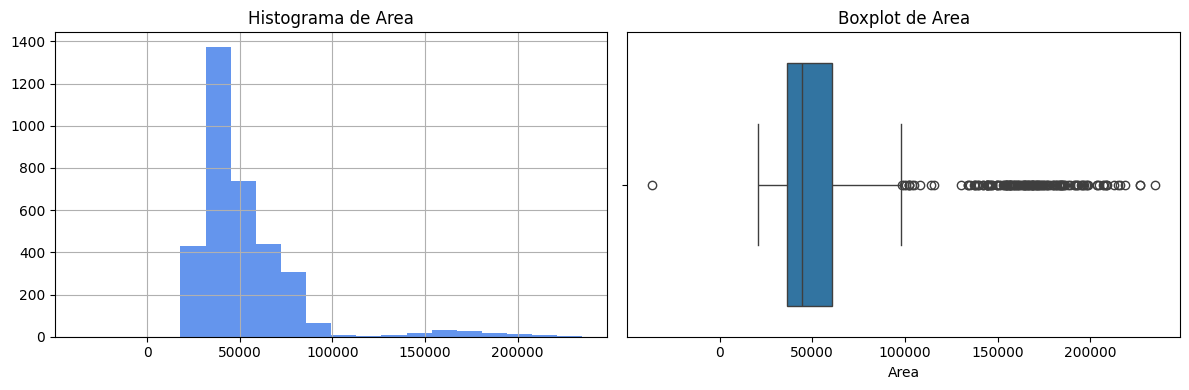

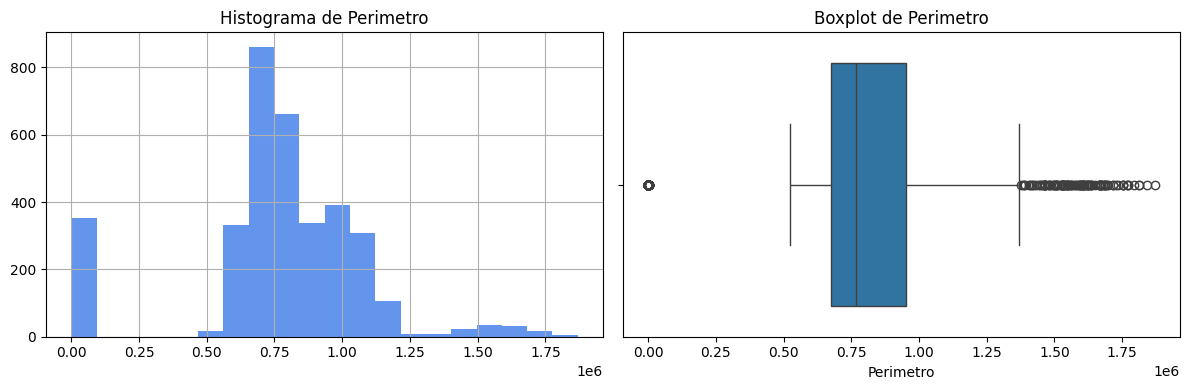

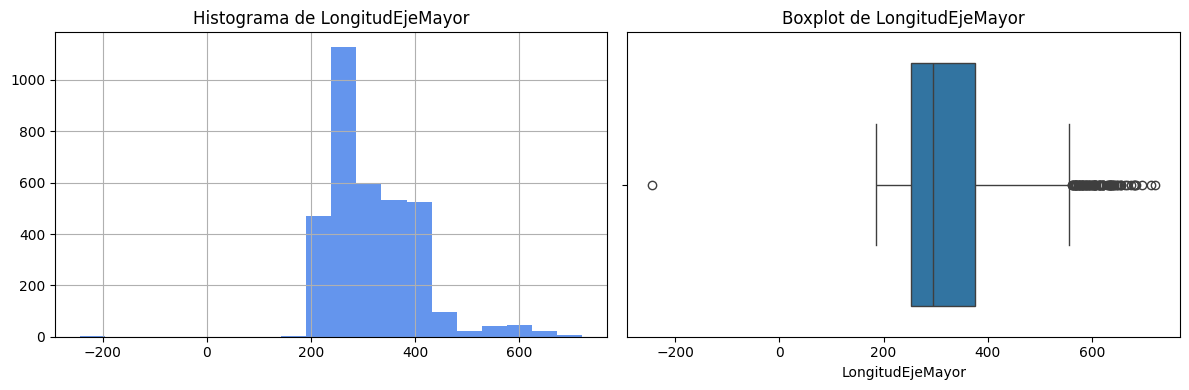

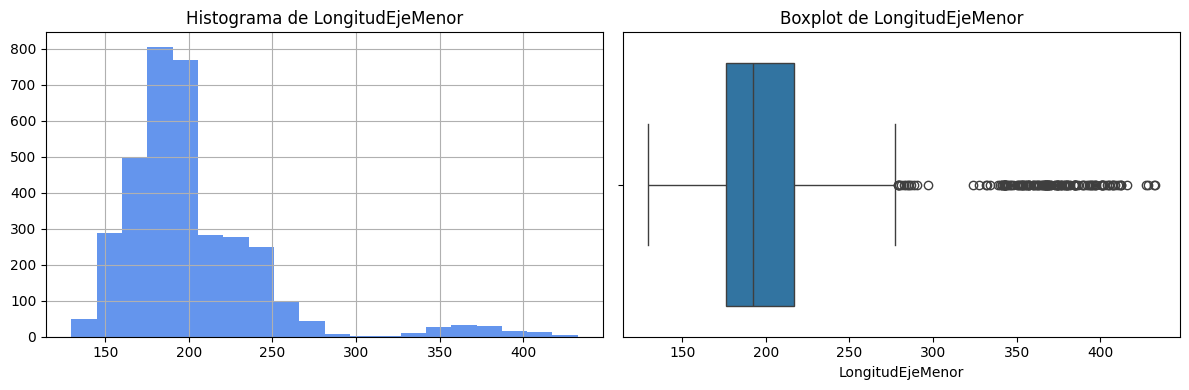

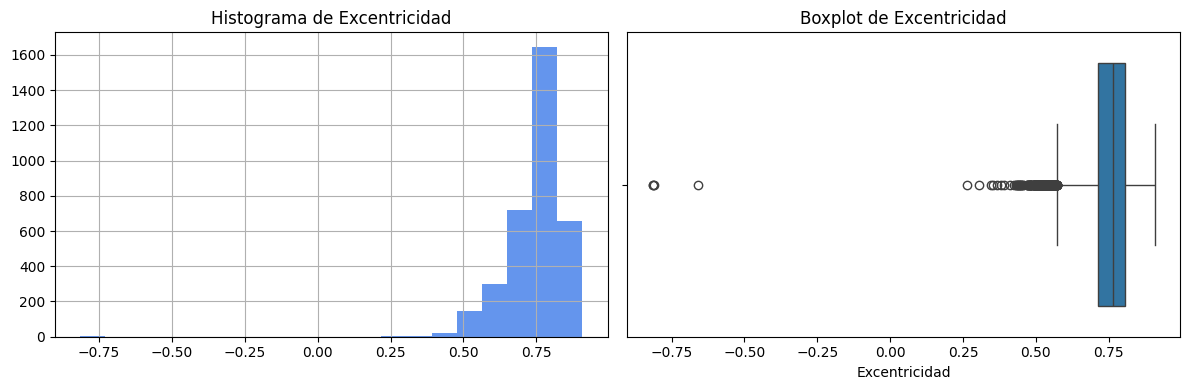

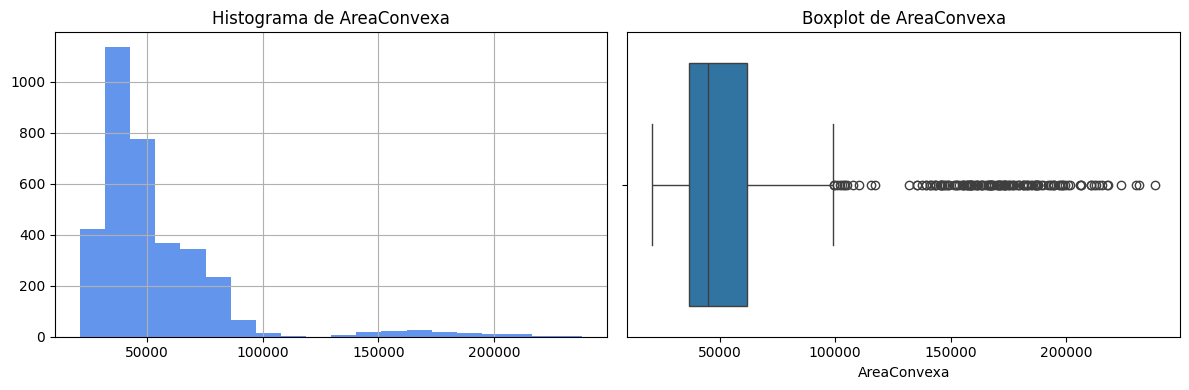

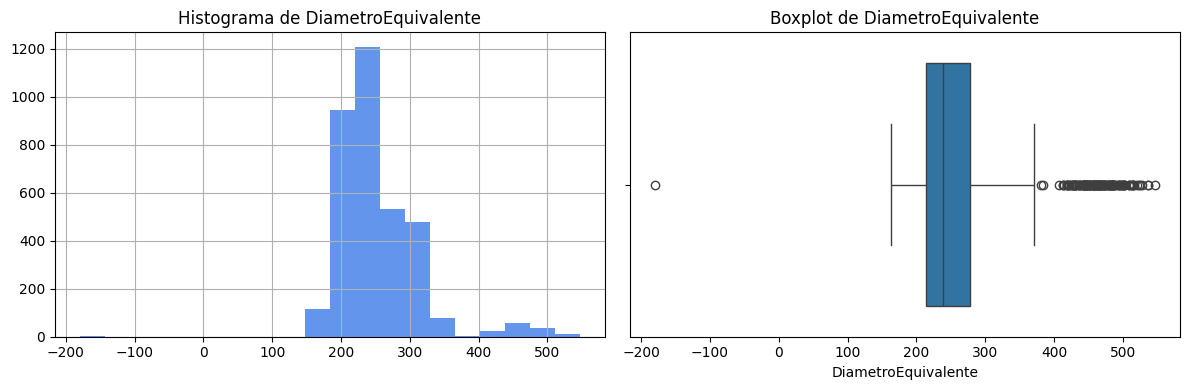

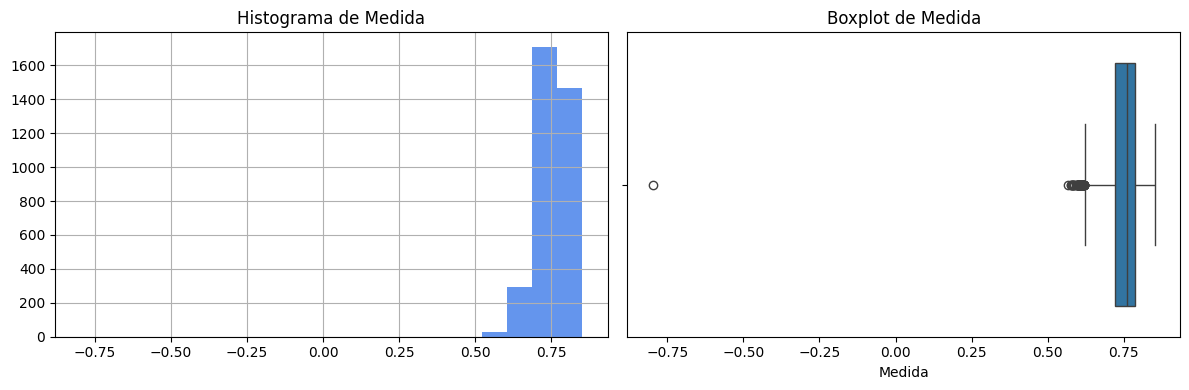

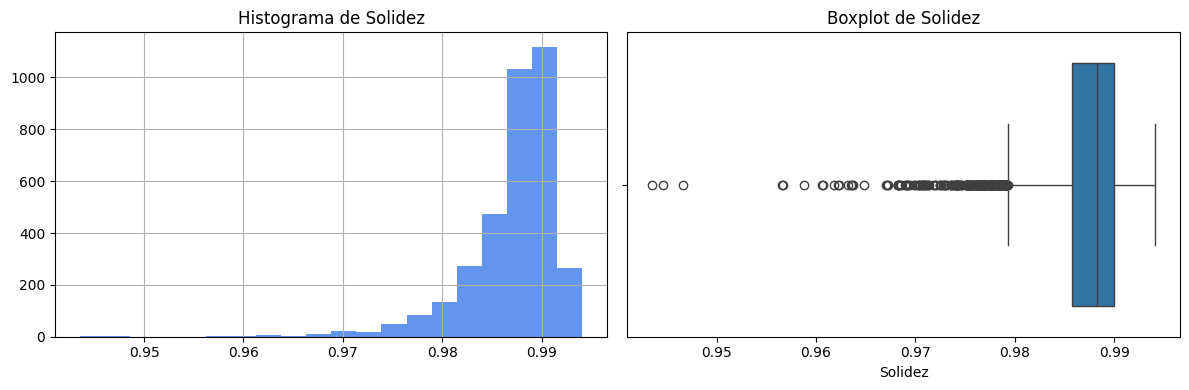

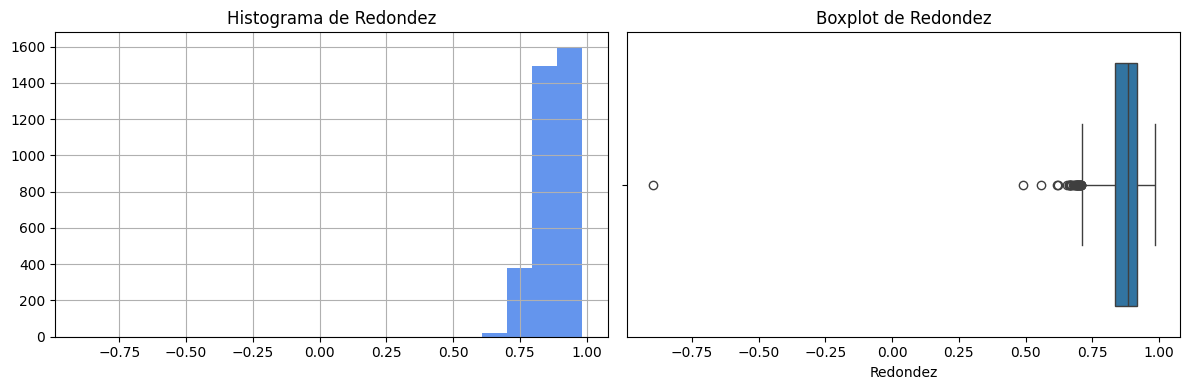

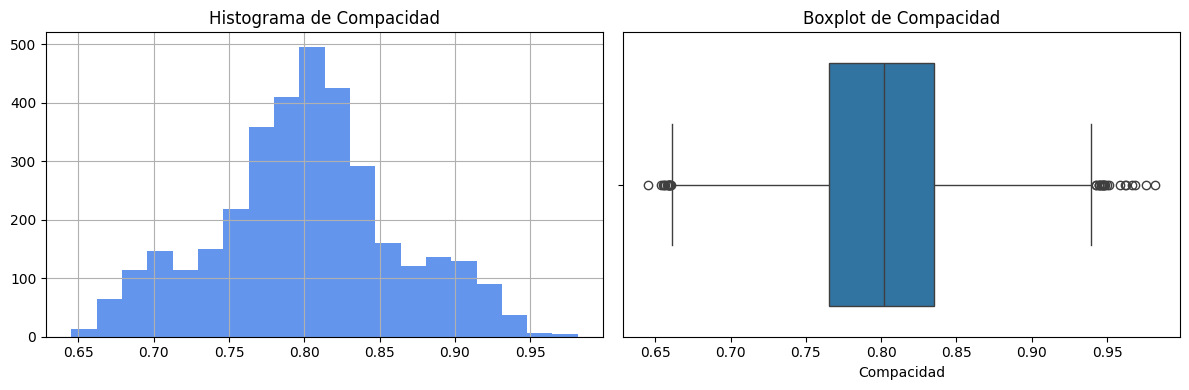

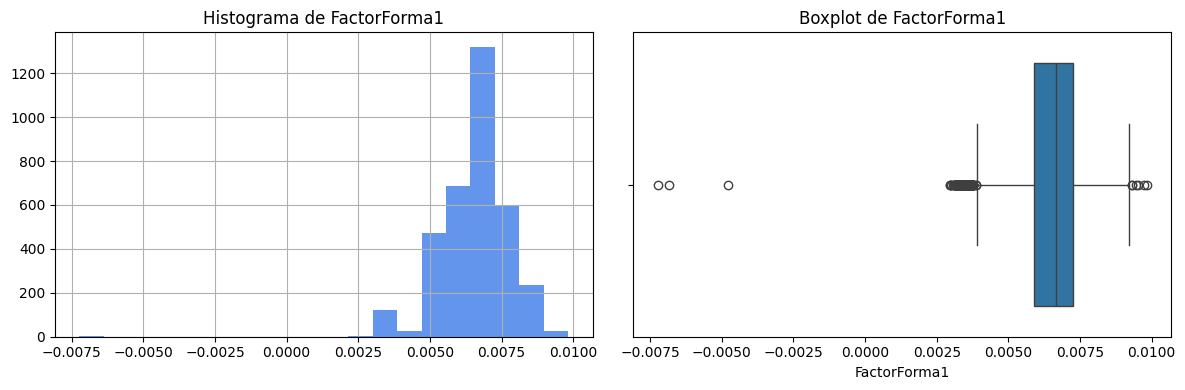

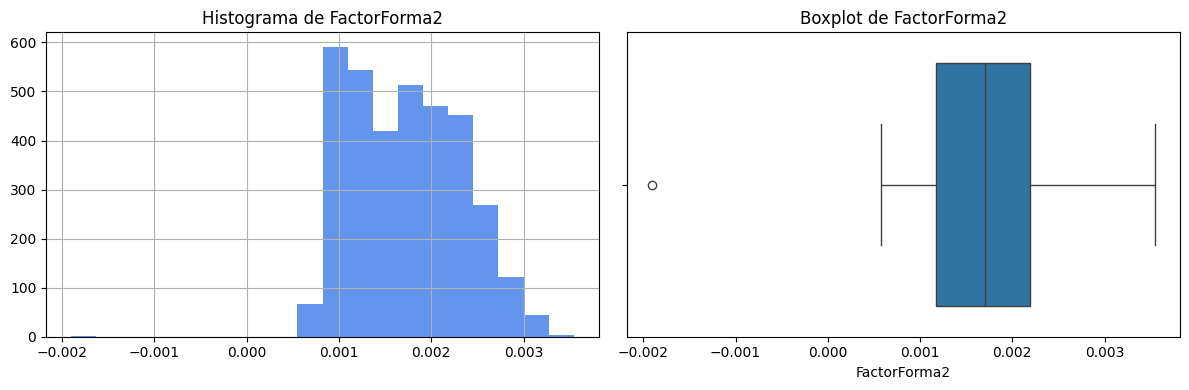

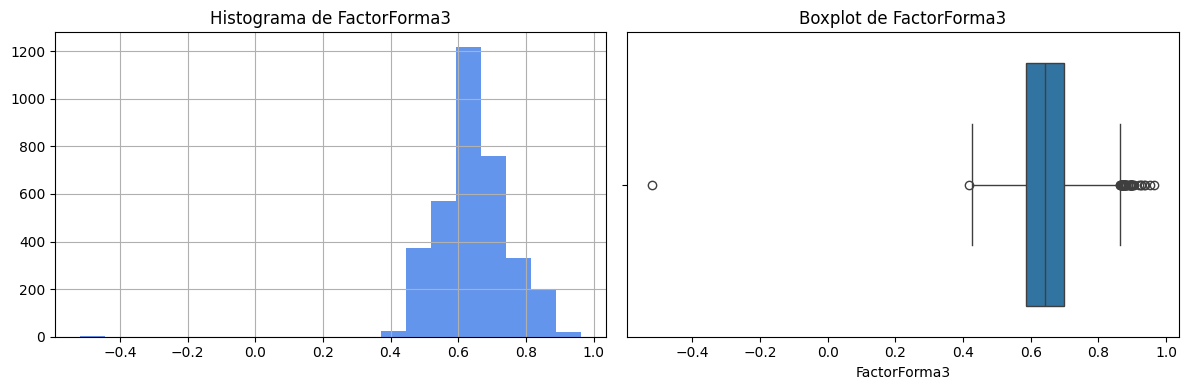

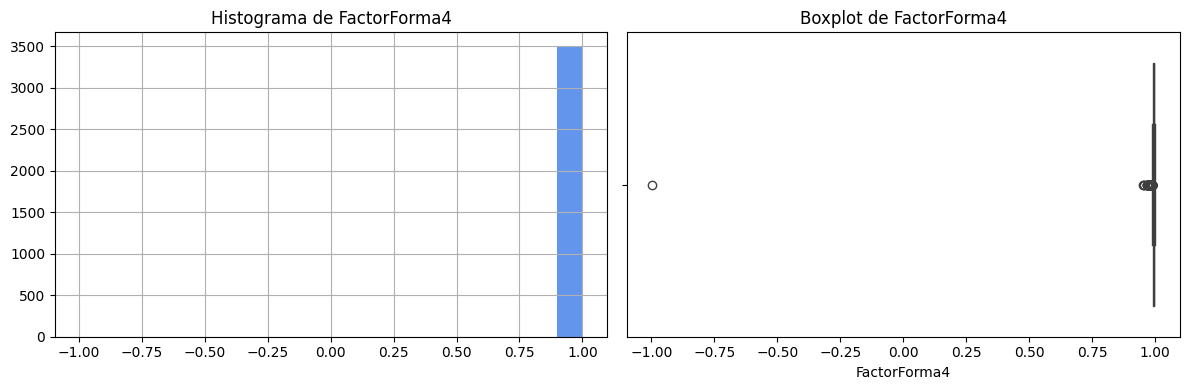

In [53]:
for col in numericas:
    fig, axes = plt.subplots(1, 2, figsize=(12,4))
    dfEliminando[col].dropna().hist(ax=axes[0], bins=20, color='cornflowerblue')
    axes[0].set_title(f"Histograma de {col}")
    sns.boxplot(data=dfEliminando, x=col, ax=axes[1])
    axes[1].set_title(f"Boxplot de {col}")
    plt.tight_layout()
    plt.show()
    

Para finalmente realizar nuestra matriz de correlación la cual nos enseña las variables con alto nivel de correlación para una posible eliminación de dichas columnas "repetidas" en información.

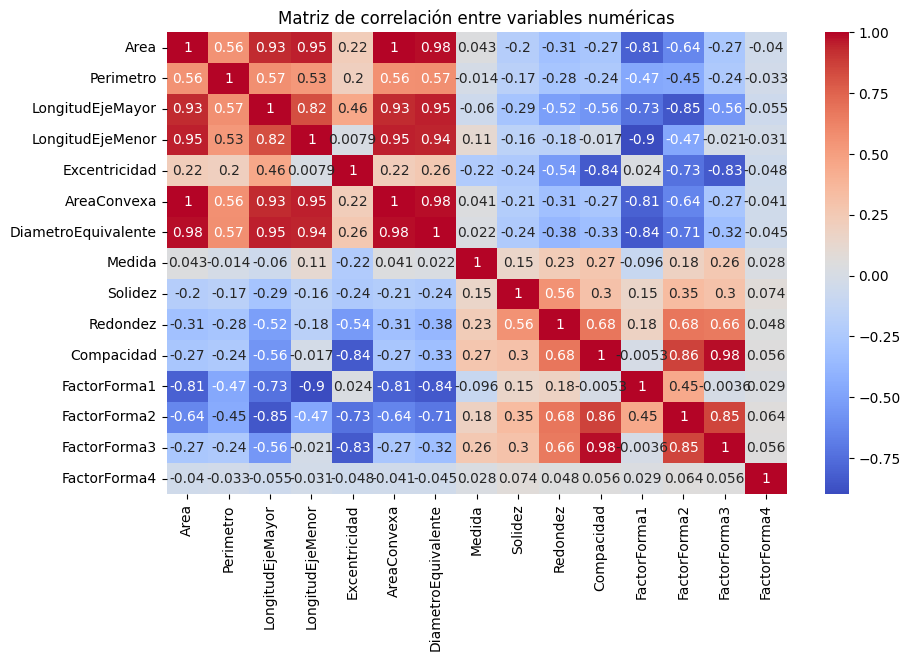

In [54]:

corr = dfEliminando[numericas].corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación entre variables numéricas')
plt.show()

### **Conclusión sobre este comportamiento**
Muchos datos eliminados, perdida de más del 50% del dataset. No muy viable

## **Observar el comportamiento del dataset realizando imputación de datos**

Empezamos este segundo análisis igual que el anterior. Creamos un nuevo dataset con el fin de no modificar el original, sino entender el comportamiento del mismo frente a este nuevo acercamiento.

In [55]:
dfPlots = df.copy()

Posterior a la creación del dataset, realizamos la imputación de datos en las columnas numéricas, siempre y cuando los valores nulos en dichas columnas no superaran el 20% del total del dataset, con el fin de preservar la calidad de la información y evitar una pérdida significativa de registros.

In [56]:
for c in numericas:
    if c in dfPlots.columns:
        if dfPlots[c].isnull().sum() < dfPlots.shape[0] * 0.2:
            dfPlots[c].fillna(dfPlots[c].median(), inplace=True)
print(dfPlots.isnull().sum())

Area                      0
Perimetro                 0
LongitudEjeMayor          0
LongitudEjeMenor          0
RelacionAspecto         448
Excentricidad             0
AreaConvexa               0
DiametroEquivalente       0
Medida                    0
Solidez                   0
Redondez                  0
Compacidad                0
FactorForma1              0
FactorForma2              0
FactorForma3              0
FactorForma4              0
DefectoVisible         2832
MétodoSecado            562
dtype: int64


C:\Users\jcsua\AppData\Local\Temp\ipykernel_22356\729992208.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfPlots[c].fillna(dfPlots[c].median(), inplace=True)
C:\Users\jcsua\AppData\Local\Temp\ipykernel_22356\729992208.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

Posterior a la imputación de datos, nos damos cuenta que las unicas variables con valores nulos son las categoricas, a las cuales no se le podian inputar datos por su naturaleza. Por lo que de momrnto las dejasmo así. Por otro lado, procedemos a mostrar como quedaron las columnas sin valores nulos ahora mostrando su head.

In [57]:
noNulas = [c for c in dfPlots.columns if dfPlots[c].isnull().sum() == 0 and c in numericas]
dfPlotsNoNulo = dfPlots[noNulas]
print(dfPlotsNoNulo.head())

    Area  Perimetro  LongitudEjeMayor  LongitudEjeMenor  Excentricidad  \
0  50836   923618.0        358.515147        181.388899       0.764180   
1  62764  1003767.0        409.207082        198.330199       0.764180   
2  59965   994266.0        389.088529        197.967275       0.860886   
3  55035      917.6        379.346822        185.390577       0.872446   
4  39324   737773.0        262.520242        191.176858       0.685326   

   AreaConvexa  DiametroEquivalente    Medida   Solidez  Redondez  Compacidad  \
0      45091.0           254.413847  0.804762  0.983840  0.748853    0.709632   
1      64158.0           282.689948  0.703995  0.978272  0.782807    0.690824   
2      60910.0           276.314692  0.661581  0.984485  0.762259    0.710159   
3      55591.0           238.544800  0.799695  0.989998  0.821376    0.697811   
4      39758.0           223.760747  0.775392  0.989084  0.907867    0.852356   

   FactorForma1  FactorForma2  FactorForma3  FactorForma4  
0      0

Igual que en el analisis anterior procedemos a revisar las disperciones de los datos realizando histogramas y boxplot.

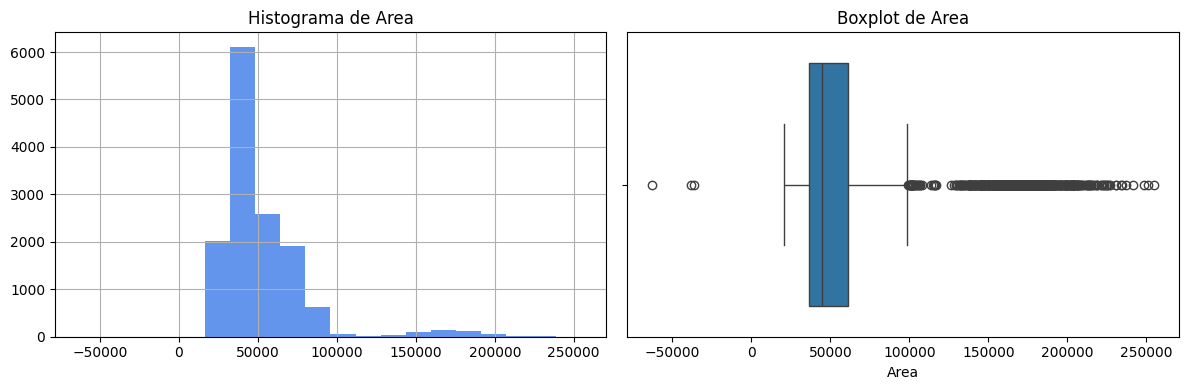

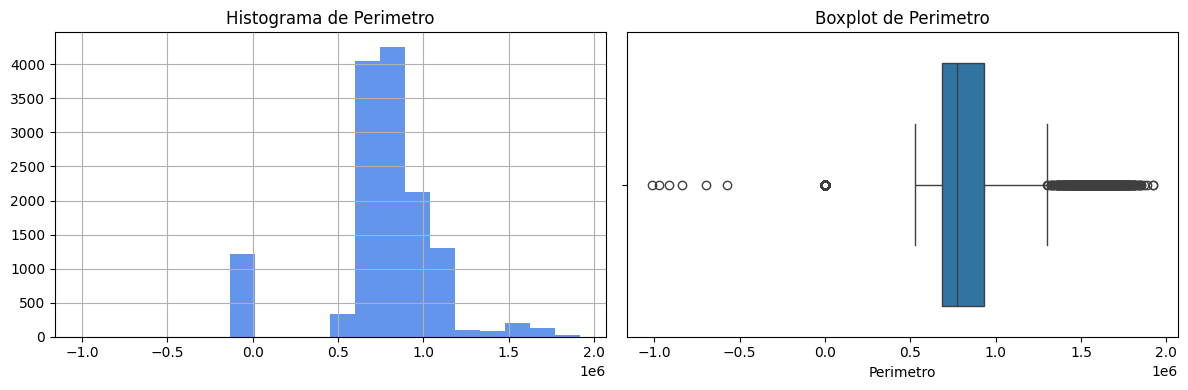

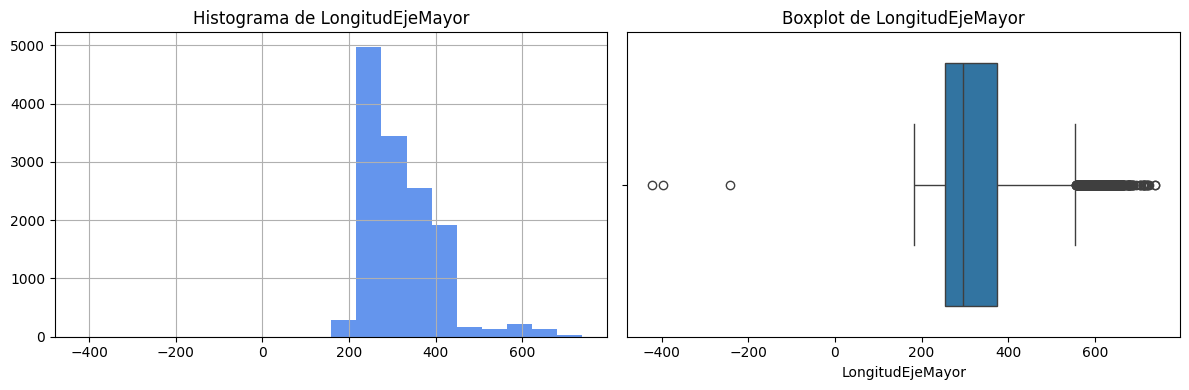

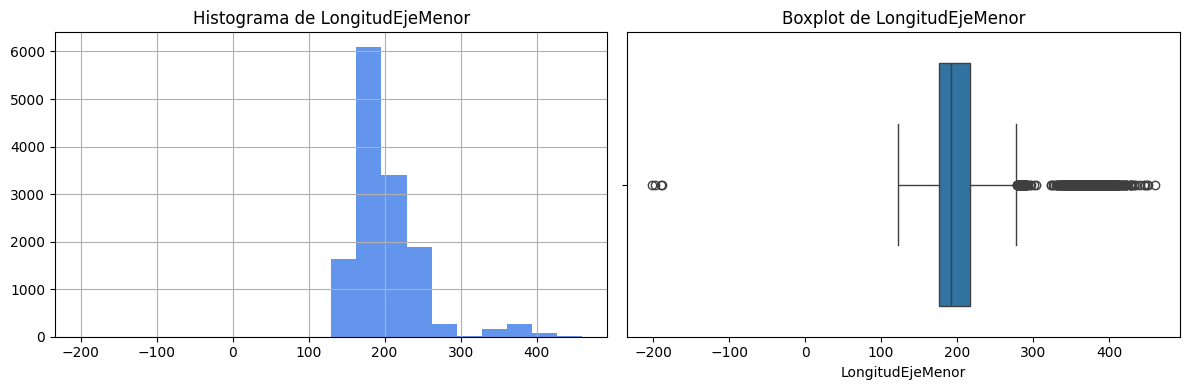

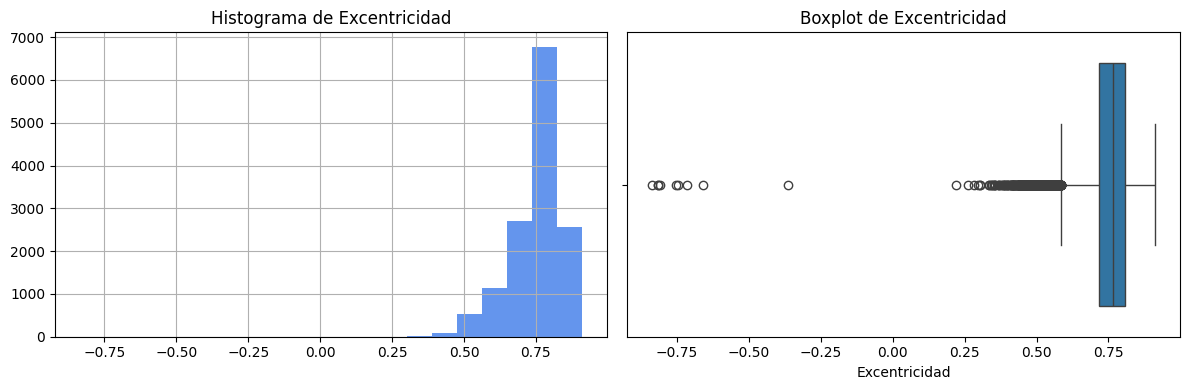

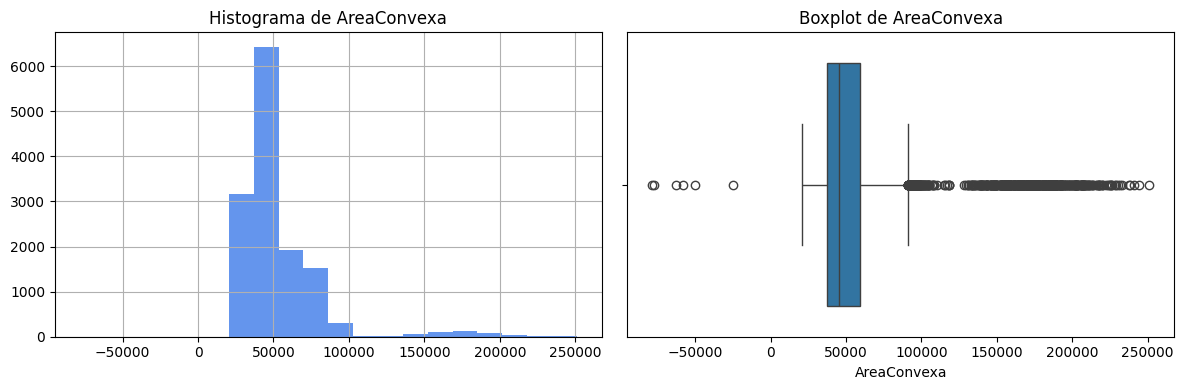

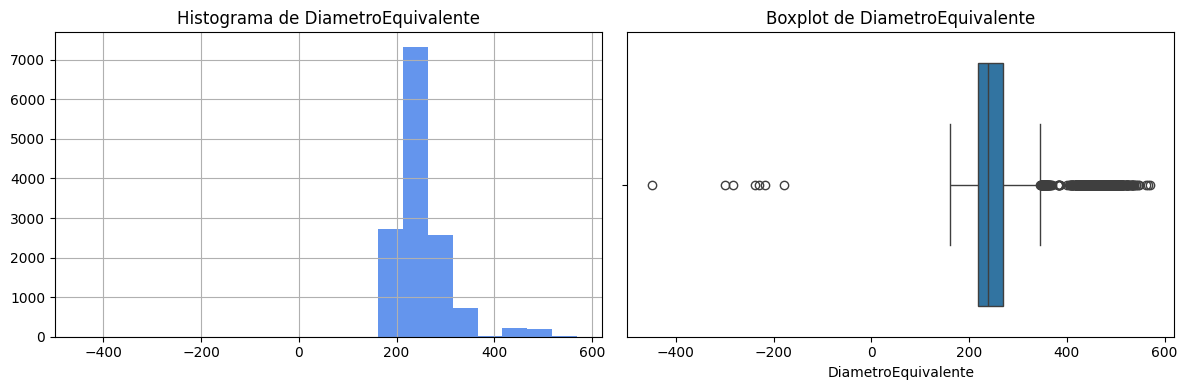

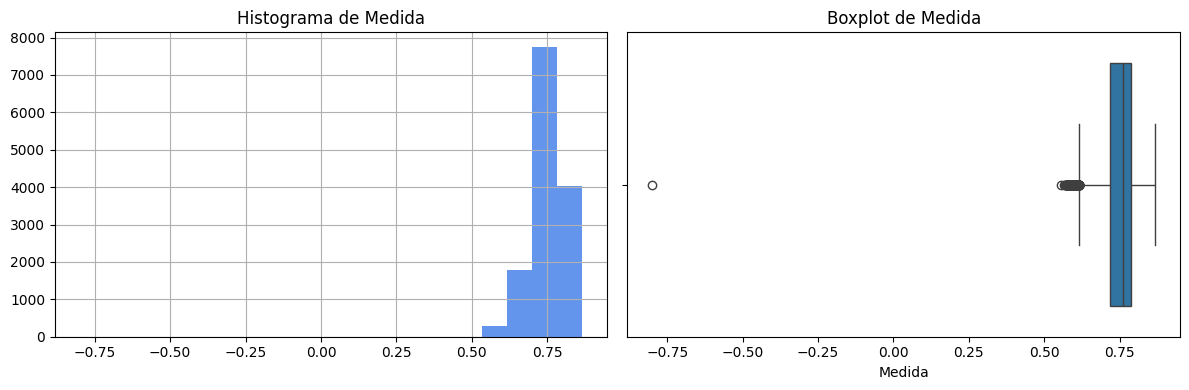

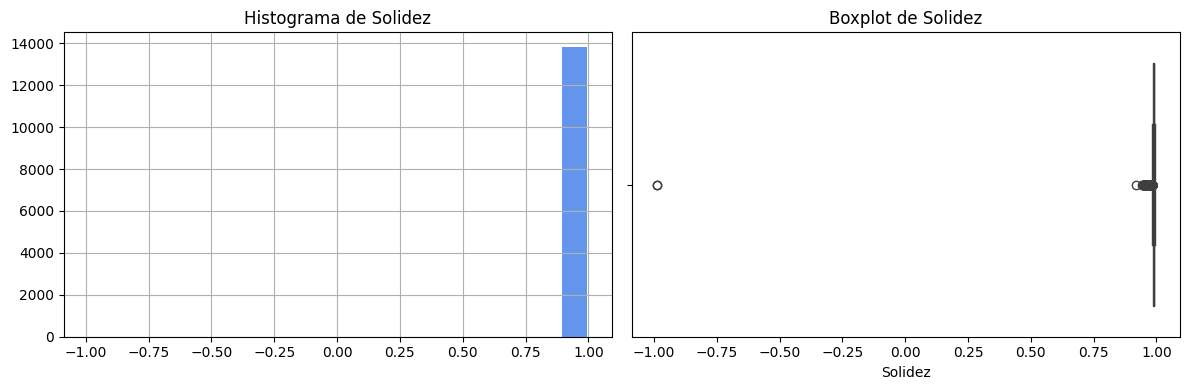

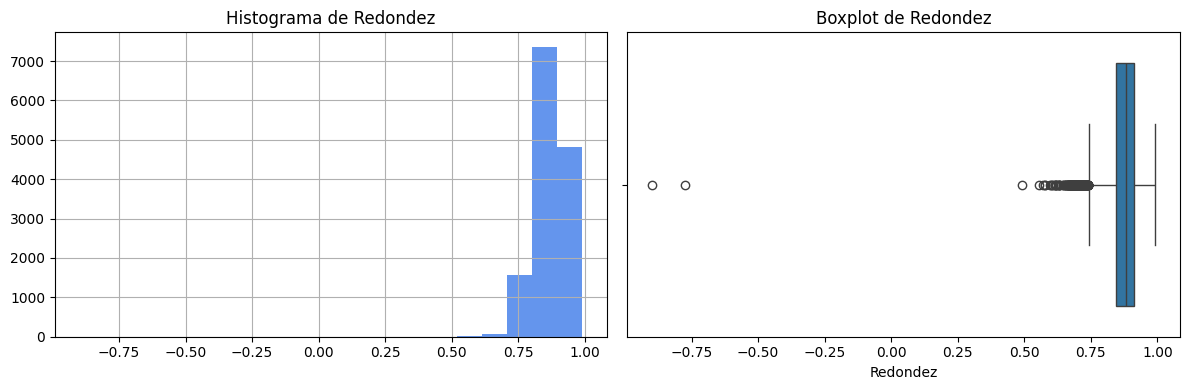

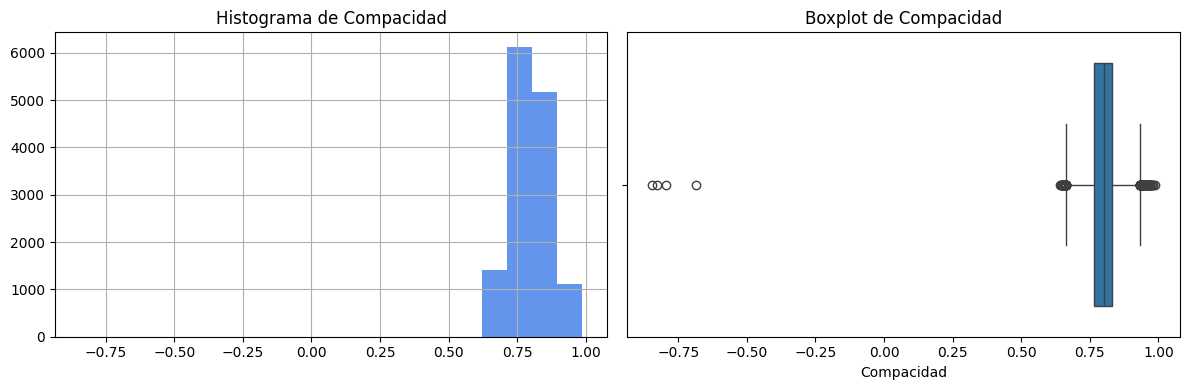

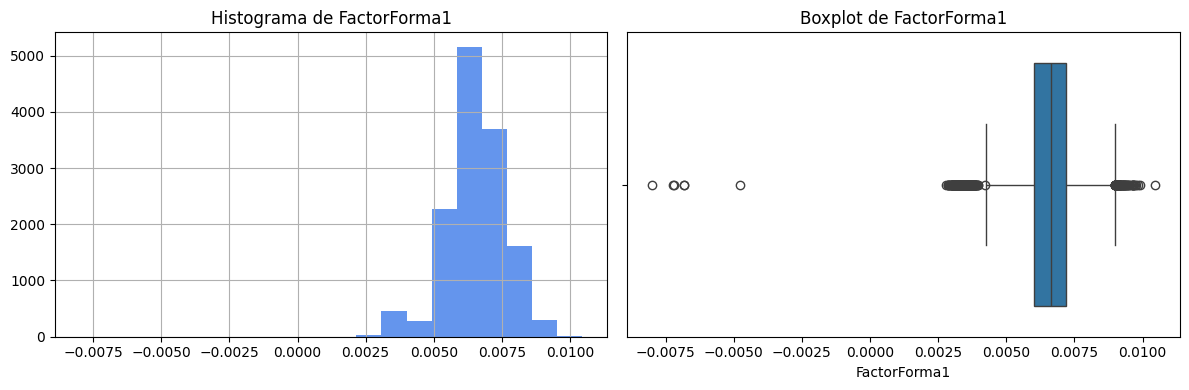

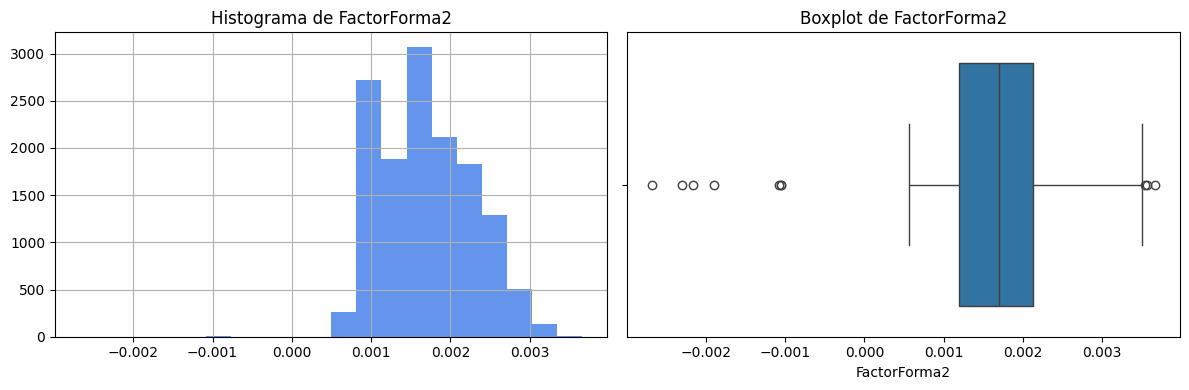

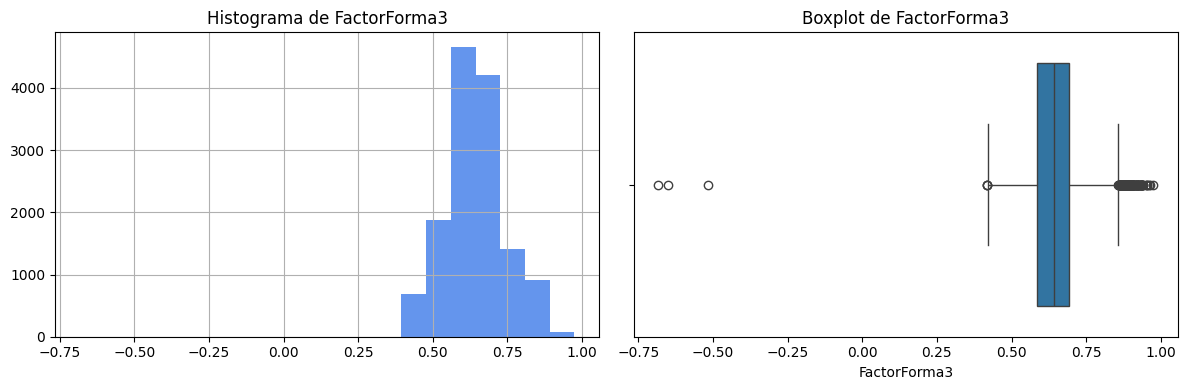

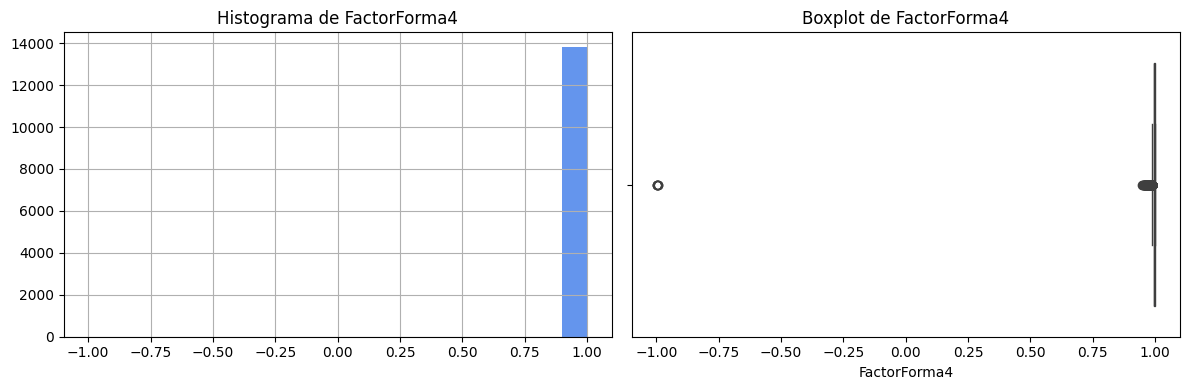

In [58]:
for col in numericas:   
    fig, axes = plt.subplots(1, 2, figsize=(12,4))
    dfPlotsNoNulo[col].dropna().hist(ax=axes[0], bins=20, color='cornflowerblue')
    axes[0].set_title(f"Histograma de {col}")
    sns.boxplot(data=dfPlotsNoNulo, x=col, ax=axes[1])
    axes[1].set_title(f"Boxplot de {col}")
    plt.tight_layout()
    plt.show()
    

De igual forma tambien realizamos una matriz de correlación con el mismo proposito que el analisis anterior.

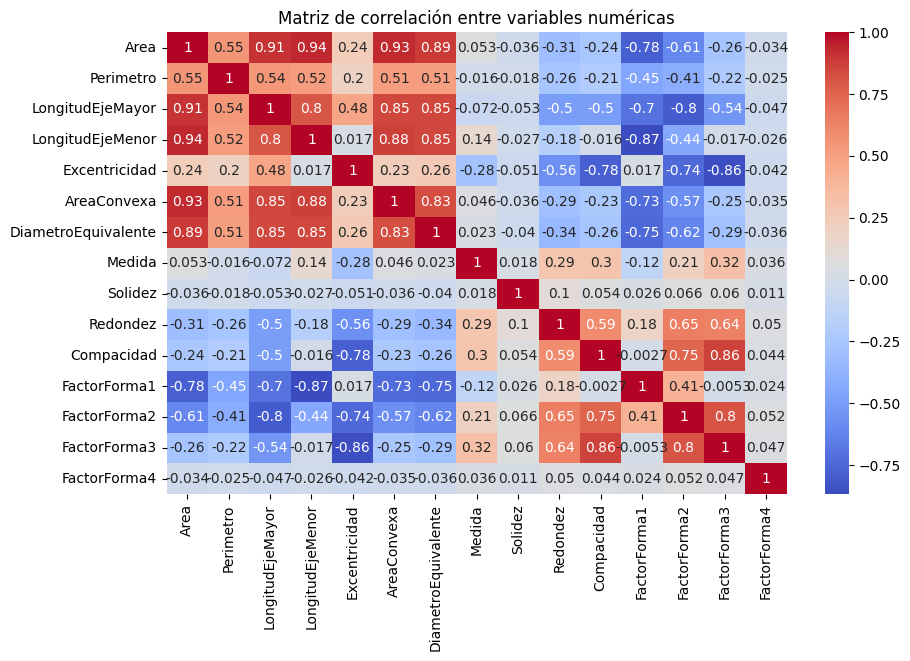

In [59]:

corr = dfPlotsNoNulo.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación entre variables numéricas')
plt.show()

# Limpieza y trata de datos general

Usaremos nuestra segunda aproximación, donde no eliminaroms los datos nulos, sino que imputaremos la mediana en estos y de este modo precervamos la mayor cantidad de datos posibles. Por lo que procedemos a convertir nuestro dataset original en el dataset trabajado previamente que ya lleva consigo la imputación de datos y analizamos los valores nulos para comprobar que esta se realizara correctamente.

In [60]:
df = dfPlots.copy()
print(df.info())
display(df.head())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 13830 entries, 0 to 14290
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Area                 13830 non-null  int64  
 1   Perimetro            13830 non-null  float64
 2   LongitudEjeMayor     13830 non-null  float64
 3   LongitudEjeMenor     13830 non-null  float64
 4   RelacionAspecto      13382 non-null  object 
 5   Excentricidad        13830 non-null  float64
 6   AreaConvexa          13830 non-null  float64
 7   DiametroEquivalente  13830 non-null  float64
 8   Medida               13830 non-null  float64
 9   Solidez              13830 non-null  float64
 10  Redondez             13830 non-null  float64
 11  Compacidad           13830 non-null  float64
 12  FactorForma1         13830 non-null  float64
 13  FactorForma2         13830 non-null  float64
 14  FactorForma3         13830 non-null  float64
 15  FactorForma4         13830 non-null  floa

,Area,Perimetro,LongitudEjeMayor,LongitudEjeMenor,RelacionAspecto,Excentricidad,AreaConvexa,DiametroEquivalente,Medida,Solidez,Redondez,Compacidad,FactorForma1,FactorForma2,FactorForma3,FactorForma4,DefectoVisible,MétodoSecado
0,50836,923618.0,358.515147,181.388899,alargado,0.764180,45091.0,254.413847,0.804762,0.983840,0.748853,0.709632,0.007052,0.001103,0.503578,0.995321,Normal,Lavado
1,62764,1003767.0,409.207082,198.330199,Alargado,0.764180,64158.0,282.689948,0.703995,0.978272,0.782807,0.690824,0.006520,0.000916,0.477237,0.984666,NaN,Natural
2,59965,994266.0,389.088529,197.967275,Alargado,0.860886,60910.0,276.314692,0.661581,0.984485,0.762259,0.710159,0.006489,0.001018,0.504326,0.991211,Normal,Natural
3,55035,917.6,379.346822,185.390577,Alargado,0.872446,55591.0,238.544800,0.799695,0.989998,0.821376,0.697811,0.006893,0.001008,0.486941,0.996380,Normal,Lavado
4,39324,737773.0,262.520242,191.176858,Alargado,0.685326,39758.0,223.760747,0.775392,0.989084,0.907867,0.852356,0.006676,0.002174,0.726511,0.997630,Normal,Lavado


Area                      0
Perimetro                 0
LongitudEjeMayor          0
LongitudEjeMenor          0
RelacionAspecto         448
Excentricidad             0
AreaConvexa               0
DiametroEquivalente       0
Medida                    0
Solidez                   0
Redondez                  0
Compacidad                0
FactorForma1              0
FactorForma2              0
FactorForma3              0
FactorForma4              0
DefectoVisible         2832
MétodoSecado            562
dtype: int64


**Observacion de columnas categoricas**

Una vez comprobado que todo está en orden debemos tratar las columnas categoricas, para esto lo que se realizo fue principalmente cambiar su valor de object a "string" con el fin de clasificarlas como un arreglo de strings. 

In [61]:
for c in categoricas:
    df[c] = df[c].astype('string')

Posteriormente analizamos los valores unicos por cada columna categorica.

In [62]:
for c in categoricas:
    print(c,df[c].unique(), len(df[c].unique()))


RelacionAspecto <StringArray>
['alargado', 'Alargado', 'Redondeado', 'redondeado', <NA>]
Length: 5, dtype: string 5
DefectoVisible <StringArray>
['Normal', <NA>, 'normal']
Length: 3, dtype: string 3
MétodoSecado <StringArray>
['Lavado', 'Natural', 'lavado', <NA>, 'natural', 'Honey', 'honey']
Length: 7, dtype: string 7


Al identificar que en algunas columnas existían valores escritos de forma diferente pero con el mismo significado, como por ejemplo “alargado” y “Alargado”, procedimos a unificar la escritura mediante la función replace, asignando un único valor común para cada caso. De esta forma, se normalizaron las categorías en las variables RelaciónAspecto, DefectoVisible y MétodoSecado, reemplazando las variaciones detectadas y asignando el valor “Desconocido” a los registros nulos, con el fin de mantener consistencia en los datos y evitar duplicidad de categorías.

In [63]:
df["RelacionAspecto"] = df["RelacionAspecto"].replace('alargado','Alargado')
df["RelacionAspecto"] = df["RelacionAspecto"].replace('redondeado','Redondeado')
df['DefectoVisible'] = df['DefectoVisible'].replace('normal','Normal')
df['DefectoVisible'] = df['DefectoVisible'].replace('defectuoso','Defectuoso')
df['MétodoSecado'] = df['MétodoSecado'].replace('lavado','Lavado')
df['MétodoSecado'] = df['MétodoSecado'].replace('natural','Natural')
df['MétodoSecado'] = df['MétodoSecado'].replace('honey','Honey')
df['RelacionAspecto'] = df['RelacionAspecto'].fillna('Desconocido')
df['DefectoVisible'] = df['DefectoVisible'].fillna('Desconocido')
df['MétodoSecado']   = df['MétodoSecado'].fillna('Desconocido')
print(df['RelacionAspecto'].unique())
print(df['DefectoVisible'].unique())
print(df['MétodoSecado'].unique())

<StringArray>
['Alargado', 'Redondeado', 'Desconocido']
Length: 3, dtype: string
<StringArray>
['Normal', 'Desconocido']
Length: 2, dtype: string
<StringArray>
['Lavado', 'Natural', 'Desconocido', 'Honey']
Length: 4, dtype: string


Observamos posteriormente que ya no hay valores nulos

In [64]:
print(df.isnull().sum())

Area                   0
Perimetro              0
LongitudEjeMayor       0
LongitudEjeMenor       0
RelacionAspecto        0
Excentricidad          0
AreaConvexa            0
DiametroEquivalente    0
Medida                 0
Solidez                0
Redondez               0
Compacidad             0
FactorForma1           0
FactorForma2           0
FactorForma3           0
FactorForma4           0
DefectoVisible         0
MétodoSecado           0
dtype: int64


Posteriormente, eliminamos las variables con un alto nivel de correlación para evitar el overfitting del modelo y reducir la redundancia de información, conservando únicamente aquellas variables que aportan un valor distintivo al análisis y mejoran la capacidad predictiva del modelo.

Columnas eliminadas por correlación > 0.8:
['LongitudEjeMayor', 'LongitudEjeMenor', 'AreaConvexa', 'DiametroEquivalente', 'FactorForma1', 'FactorForma3']


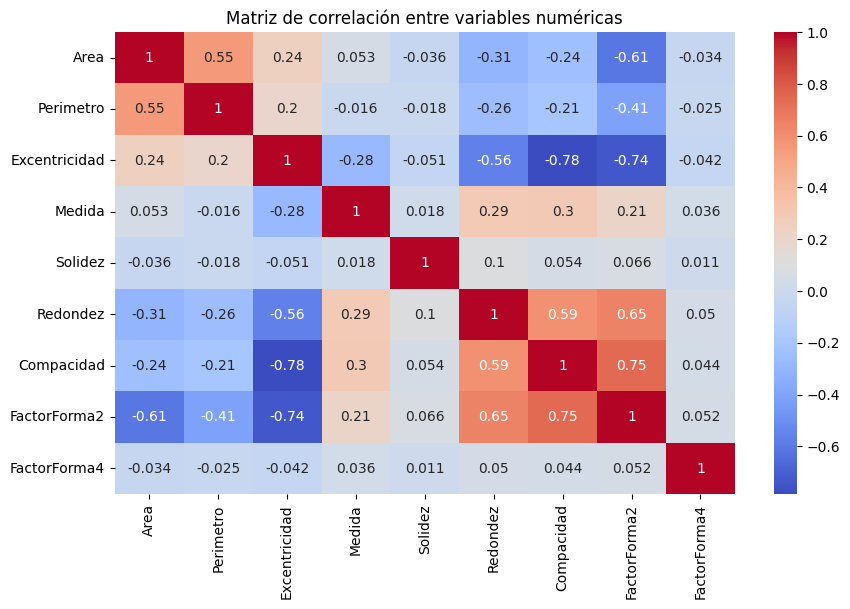

In [65]:
def eliminar_altamente_correlacionadas(df, threshold=0.9):

    corr_matrix = df.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    print("Columnas eliminadas por correlación > {}:".format(threshold))
    print(to_drop)
    return df.drop(columns=to_drop)

df_filtrado = eliminar_altamente_correlacionadas(df[numericas], threshold=0.8)

corr = df_filtrado.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación entre variables numéricas')
plt.show()

Por ultimo en el dataset agregamos las columnas categoricas previamente descritas.

In [66]:
df = df_filtrado.join(df[categoricas])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 13830 entries, 0 to 14290
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13830 non-null  int64  
 1   Perimetro        13830 non-null  float64
 2   Excentricidad    13830 non-null  float64
 3   Medida           13830 non-null  float64
 4   Solidez          13830 non-null  float64
 5   Redondez         13830 non-null  float64
 6   Compacidad       13830 non-null  float64
 7   FactorForma2     13830 non-null  float64
 8   FactorForma4     13830 non-null  float64
 9   RelacionAspecto  13830 non-null  string 
 10  DefectoVisible   13830 non-null  string 
 11  MétodoSecado     13830 non-null  string 
dtypes: float64(8), int64(1), string(3)
memory usage: 1.4 MB
None


# **Transformaciones necesarias para el modelo de GMM (Gaussian Mixture Model) Santiago Gomez** 

Empezamos este modelo con una explicación de cómo funciona.

* GMMM: El algoritmo GMM agrupa los datos, suponiendo que cada grupo sigue una distribución normal. Aprende el centro, la forma y el tamaño de cada grupo y luego calcula la probabilidad de que cada dato pertenezca a uno u otro. Así, en lugar de asignar un dato a un único grupo de forma rígida, GMM permite asignaciones basadas en probabilidades, lo que hace que los clusters resultantes sean más flexibles y realistas que con métodos como KMeans. Pese a que nuestros datos no tienen forma de una normal 100% perfecta si se alcanza a distinguir esta distribución.

Empezamos realizando una copia de nuestro df original con el fin de tener todas las transformaciones previamente realizadas en un df nuevo donde se realizará a cabo el estudio de este algoritmo.

In [67]:

dfGMM = df.copy()

Posteriormente, realizamos un one hot encoding sobre las variables categóricas con el fin de transformarlas en características numéricas interpretables por el modelo. Para ello, se generaron dummies a partir de cada categoría, eliminando la columna original y conservando únicamente las nuevas representaciones codificadas, lo que permitió integrar adecuadamente este tipo de variables en el análisis posterior.

In [68]:
for c in categoricas:
    dummies = pd.get_dummies(dfGMM[c], prefix=c, drop_first=True)
    dfGMM = pd.concat([dfGMM, dummies], axis=1)
    dfGMM.drop(columns=[c], inplace=True)
print(dfGMM.info())

<class 'pandas.core.frame.DataFrame'>
Index: 13830 entries, 0 to 14290
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Area                         13830 non-null  int64  
 1   Perimetro                    13830 non-null  float64
 2   Excentricidad                13830 non-null  float64
 3   Medida                       13830 non-null  float64
 4   Solidez                      13830 non-null  float64
 5   Redondez                     13830 non-null  float64
 6   Compacidad                   13830 non-null  float64
 7   FactorForma2                 13830 non-null  float64
 8   FactorForma4                 13830 non-null  float64
 9   RelacionAspecto_Desconocido  13830 non-null  boolean
 10  RelacionAspecto_Redondeado   13830 non-null  boolean
 11  DefectoVisible_Normal        13830 non-null  boolean
 12  MétodoSecado_Honey           13830 non-null  boolean
 13  MétodoSecado_Lavado  

Después de realizar los dummies anteriores, separamos por dos conjuntos nuestras columnas, tanto numismáticas, como nuestros dummies.

In [69]:
numericasGMM = df.select_dtypes(include=['int64', 'float64']).columns
dummiesGMM = dfGMM.select_dtypes(include=['uint8','bool','boolean']).columns.tolist()
print("Columnas numéricas para GMM:", numericasGMM.tolist())
print("Columnas categóricas para GMM (dummies):", dummiesGMM)

Columnas numéricas para GMM: ['Area', 'Perimetro', 'Excentricidad', 'Medida', 'Solidez', 'Redondez', 'Compacidad', 'FactorForma2', 'FactorForma4']
Columnas categóricas para GMM (dummies): ['RelacionAspecto_Desconocido', 'RelacionAspecto_Redondeado', 'DefectoVisible_Normal', 'MétodoSecado_Honey', 'MétodoSecado_Lavado', 'MétodoSecado_Natural']



Posteriormente, separamos las variables continuas dentro del conjunto de datos numéricos con el fin de aplicar un proceso de escalado, ya que estas pueden tener diferentes rangos y magnitudes que afectarían el desempeño del modelo. Para ello utilizamos StandardScaler, normalizando únicamente las variables continuas y excluyendo las variables ficticias generadas por one hot encoding, dado que estas ya se encuentran en una escala binaria (0 y 1) y no requieren ajuste. De esta manera, garantizamos que todas las variables continuas tengan un peso comparable en el modelo sin distorsionar la información de las categóricas codificadas.

In [70]:
continuas = [c for c in numericasGMM if c not in categoricas]

scaler = StandardScaler()
dfGMM[continuas] = scaler.fit_transform(dfGMM[continuas])

Posteriormente, integramos en un mismo conjunto las variables generadas mediante one hot encoding y las variables continuas previamente escaladas, con el objetivo de conformar nuestras features que servirán como entrada para el modelo.

In [71]:
features = continuas + dummiesGMM
X = dfGMM[features]
print("Shape de X:", X.shape)
X[features].head()

Shape de X: (13830, 15)


,Area,Perimetro,Excentricidad,Medida,Solidez,Redondez,Compacidad,FactorForma2,FactorForma4,RelacionAspecto_Desconocido,RelacionAspecto_Redondeado,DefectoVisible_Normal,MétodoSecado_Honey,MétodoSecado_Lavado,MétodoSecado_Natural
0,-0.073455,0.486036,0.140083,1.084752,-0.131038,-2.139705,-1.356002,-1.054303,0.023049,False,False,True,False,True,False
1,0.333805,0.742677,0.140083,-0.900158,-0.361607,-1.561763,-1.640132,-1.378745,-0.256805,False,False,False,False,False,True
2,0.238238,0.712254,1.131866,-1.735649,-0.104317,-1.911516,-1.348043,-1.201910,-0.084899,False,False,True,False,False,True
3,0.069912,-2.468488,1.250422,0.984942,0.123991,-0.905268,-1.534571,-1.218981,0.050854,False,False,True,False,True,False
4,-0.466511,-0.109047,-0.668614,0.506220,0.086123,0.566912,0.800073,0.800612,0.083696,False,False,True,False,True,False


Una vez generados nuestros features y haberlos cargado en X, entrenamos varios modelos, variando el número de grupos de 2 a 9, para explorar diferentes posibles segmentaciones del dataset. Para cada modelo calculamos los criterios BIC y AIC, donde estás son métricas que evaluarán la calidad de nuestro modelo, penalizando por la complejidad del mismo. Finalmente, seleccionamos como modelo óptimo aquel con el menor valor de BIC, garantizando una agrupación adecuada de los datos sin incrementar innecesariamente la complejidad del modelo.

El rango de iteración se postuló en estos valores, ya que al aumentar la cantidad de iteraciones de k:

1. El tiempo de ejecución aumentaba demasiado
2. El modelo empezaba a sobre ajustarse

En el algoritmo se usó la configuración covariance_type='diag', que simplifica el cálculo al asumir que las variables dentro de cada cluster no están fuertemente correlacionadas, lo que ayuda a evitar sobreajuste, el parámetro reg_covar=1e-2, que agrega un pequeño valor a la covarianza para mejorar la estabilidad numérica y prevenir problemas en clusters con baja variabilidad y n_init=5, que repite el proceso de inicialización varias veces para reducir el riesgo de caer en soluciones locales poco representativas.

In [72]:


bicScores, aicScores, models = [], [], []
nClusters = range(2, 10)

for k in nClusters:
    gmm = GaussianMixture(
        n_components=k  ,
        covariance_type='diag', 
        reg_covar=1e-2,         
        n_init=5,
        random_state=42
    )
    gmm.fit(X)
    bicScores.append(gmm.bic(X))
    aicScores.append(gmm.aic(X))
    models.append(gmm)

k_best = nClusters[np.argmin(bicScores)]
best_model = models[np.argmin(bicScores)]

Posterior al análisis anterior, validamos los resultados con un procedimiento de validación cruzada utilizando el índice silhouette. Para ello, se entrenaron modelos GMM con diferentes valores de k (de 2 a 9) y en cada caso se repitió el entrenamiento y la evaluación en cinco particiones distintas de los datos. Con esto se obtuvo el promedio y la variabilidad del silhouette para cada k, valores que se representaron en un gráfico de barras de error.

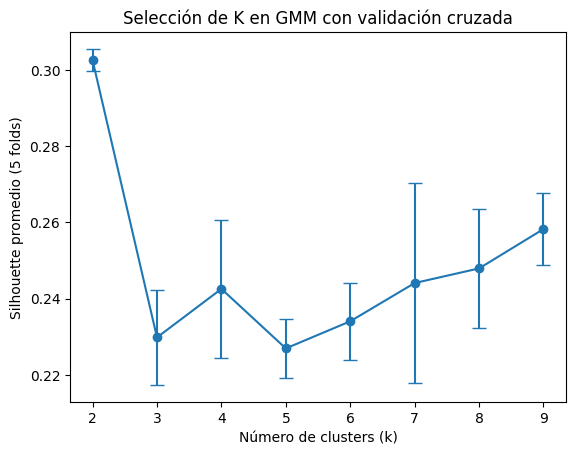

In [73]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

silsMean = []
silsStd  = []

for k in range(2, 10):
    sils = []
    for trainIdx, testIdx in kf.split(X):
        model = GaussianMixture(
            n_components=k,
            covariance_type='diag',
            reg_covar=1e-2,
            n_init=5,
            random_state=42
        ).fit(X.iloc[trainIdx])

        preds = model.predict(X.iloc[testIdx])
        sils.append(silhouette_score(X.iloc[testIdx], preds))

    silsMean.append(np.mean(sils))
    silsStd.append(np.std(sils))

ks = list(range(2, 10))
plt.errorbar(ks, silsMean, yerr=silsStd, marker='o', capsize=5)
plt.xlabel("Número de clusters (k)")
plt.ylabel("Silhouette promedio (5 folds)")
plt.title("Selección de K en GMM con validación cruzada")
plt.show()

Además, se realizó una validación complementaria utilizando los criterios de información BIC y AIC. Para ello, se entrenaron modelos GMM con diferentes valores de k y se calcularon ambos indicadores, los cuales penalizan la complejidad excesiva del modelo y permiten comparar su ajuste de manera objetiva. Los resultados se representaron gráficamente, mostrando las curvas de BIC y AIC en función del número de clusters.


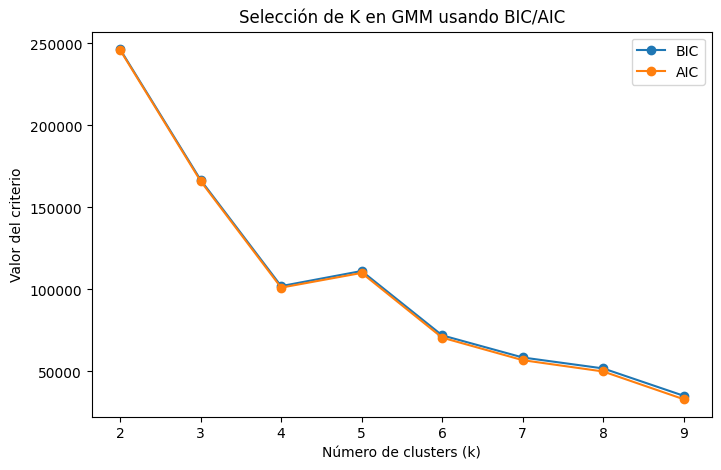

In [74]:
plt.figure(figsize=(8,5))
plt.plot(nClusters, bicScores, marker='o', label='BIC')
plt.plot(nClusters, aicScores, marker='o', label='AIC')
plt.xlabel("Número de clusters (k)")
plt.ylabel("Valor del criterio")
plt.title("Selección de K en GMM usando BIC/AIC")
plt.legend()
plt.show()

Si bien el análisis con el índice silhouette sugería un mejor comportamiento relativo alrededor de k=5, las gráficas de BIC y AIC mostraron una mejora consistente hasta k=9. Esto significa que, aunque un número menor de clusters podría parecer adecuado desde la separación geométrica, el modelo con 9 clusters ofrece un ajuste estadístico más sólido y equilibrado, razón por la cual se decidió trabajar con este valor en lugar de 5.


Posteriormente, nos dimos cuenta de que había clusters muy pequeños, algunos con solo 3 o 5 datos, lo que no era representativo. Por eso fijamos una regla: si un cluster tenía menos del 2% del total de datos, se consideraba un micro-cluster. En esos casos, los datos no se dejaron aislados, sino que se pasaron al cluster más grande donde tuvieran mayor probabilidad de pertenecer según el modelo. Así logramos que los clusters finales quedaran más equilibrados y útiles para el análisis.

In [75]:
labels = best_model.predict(X)
proba  = best_model.predict_proba(X)

nFilas = len(labels)
fraccionMinima = 0.02                          
tamanoMinimo = nFilas * fraccionMinima 

tamanoPorCluster = pd.Series(labels).value_counts()
idsMicroClusters = tamanoPorCluster[tamanoPorCluster < tamanoMinimo].index.tolist()
idsClustersGrandes = tamanoPorCluster.index[tamanoPorCluster >= tamanoMinimo].tolist()

print(f"Micro-clusters detectados: {idsMicroClusters} | tamaños: {tamanoPorCluster[tamanoPorCluster < tamanoMinimo].to_dict()}")

etiquetaFinal = labels.copy()         
confianzaFinal = proba.max(axis=1).copy()    

if len(idsMicroClusters) > 0 and len(idsClustersGrandes) > 0:
    probasEnGrandes = proba[:, idsClustersGrandes]

    idx_mejor_grande_por_fila = np.argmax(probasEnGrandes, axis=1)     
    idMejorGrandePorFila = np.array(idsClustersGrandes)[idx_mejor_grande_por_fila]
    probMejorGrandePorFila = probasEnGrandes[np.arange(probasEnGrandes.shape[0]), idx_mejor_grande_por_fila]
    esMicroFila = np.isin(labels, idsMicroClusters)
    etiquetaFinal[esMicroFila]  = idMejorGrandePorFila[esMicroFila]
    confianzaFinal[esMicroFila] = probMejorGrandePorFila[esMicroFila]

df_results_final = df.copy() 
df_results_final["cluster"] = etiquetaFinal
df_results_final["confianza"] = confianzaFinal

print("\nTamaños por cluster (tras reasignar):")
print(df_results_final["cluster"].value_counts())

print("\nConfianza por cluster (tras reasignar):")
print(df_results_final.groupby("cluster")["confianza"].agg(["mean","median","min","max"]))

if "DefectoVisible" in df_results_final.columns:
    print("\n% DefectoVisible por cluster:")
    print(df_results_final.groupby("cluster")["DefectoVisible"].value_counts(normalize=True))

if "MétodoSecado" in df_results_final.columns:
    print("\n% MétodoSecado por cluster:")
    print(df_results_final.groupby("cluster")["MétodoSecado"].value_counts(normalize=True))

Micro-clusters detectados: [4, 5] | tamaños: {4: 5, 5: 2}

Tamaños por cluster (tras reasignar):
cluster
7    3285
6    2718
0    2600
1    2394
3    1692
2     592
8     549
Name: count, dtype: int64

Confianza por cluster (tras reasignar):
             mean    median       min       max
cluster                                        
0        0.979252  0.999991  0.500078  1.000000
1        0.981421  0.999800  0.500497  0.999983
2        0.963424  0.999992  0.506270  1.000000
3        0.999993  1.000000  0.987994  1.000000
6        0.980143  0.999994  0.501153  1.000000
7        0.977065  0.999977  0.000000  1.000000
8        0.991246  1.000000  0.506082  1.000000

% DefectoVisible por cluster:
cluster  DefectoVisible
0        Normal            0.804231
         Desconocido       0.195769
1        Normal            0.783626
         Desconocido       0.216374
2        Normal            0.765203
         Desconocido       0.234797
3        Normal            0.792553
         Desconocid

Por último, hacemos una impresión visual de cómo quedaron asignados los diferentes valores dados la ejecución del algoritmo y su ajuste.

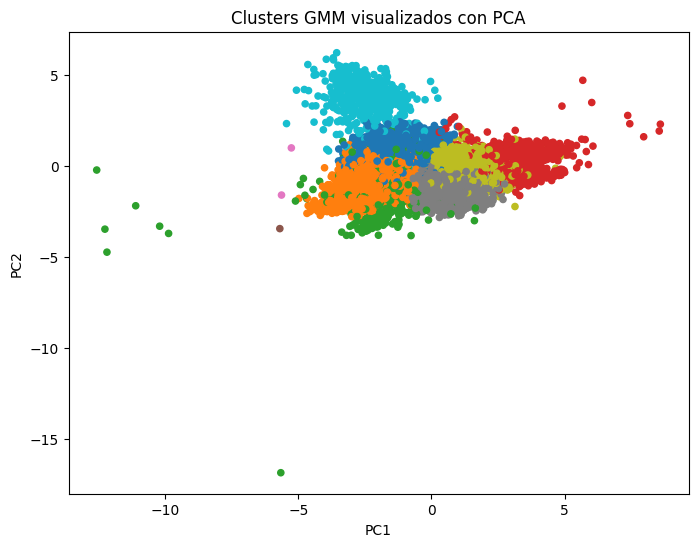

In [76]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='tab10', s=20)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Clusters GMM visualizados con PCA")
plt.show()

### **Análisis cuantitativo**


La mayoría de los registros se concentran en cuatro clusters grandes, mientras que los demás, en grupos más reducidos los cuales siguen siendo representativos. La asignación fue confiable, con promedios de confianza entre 0.96 y 0.99 y medianas cercanas a 1. En DefectoVisible predominan los granos normales, aunque el cluster 4 tiene más defectuosos con 23.5% y el 8 menos con 17.5%. Por otro lado, en MétodoSecado se ven diferencias claras, algunos clusters son casi exclusivos de un método Natural o Lavado, y otros mezclan varias categorías, como el 0 y el 4. Esto muestra que, tras el ajuste, los clusters quedaron más equilibrados y útiles para describir tanto la forma como el procesamiento de los granos.

### **Análisis cualitativo**

Si bien el análisis con el índice silhouette sugería un mejor comportamiento relativo alrededor de k=5, las gráficas de BIC y AIC mostraron una mejora consistente hasta k=9. Esto significa que, aunque un número menor de clusters podría parecer adecuado desde la separación geométrica, el modelo con 9 clusters ofrece un ajuste estadístico más sólido y equilibrado, razón por la cual se decidió trabajar con este valor en lugar de 5.

La visualización con PCA muestra cómo se distribuyen los clusters en dos dimensiones. Se ven varios grupos diferenciados, aunque algunos se sobreponen en la zona central, lo cual es normal porque PCA reduce la información. Hay clusters más compactos y otros más dispersos, y también aparecen algunos puntos aislados que podrían ser valores atípicos. En general, el gráfico confirma que el modelo logra separar los datos en grupos, aunque no todos están totalmente definidos.

### **Uso de AI**
El uso de IA en este apartado se centró en la explicación del modelo GMM, facilitando la comprensión de su correcto uso y funcionamiento. Además, ayudó a manejar errores durante la implementación del código y contribuyó a mejorar la redacción de las ideas explicativas del modelo, haciendo que la documentación fuera más clara y entendible.

# **Transformaciones necesarias para el modelo de DBScan - Sebastian Martinez**
DBSCAN es un algoritmo de clustering que agrupa los datos basándose en la densidad de puntos que hay en cada cluster que el mismo ve. Estos clusters los identicica en regiones que ve puntos que estan densamente conectados entre si y los separa de las zonas de baja densidad, zonas que denomina como ruido. Usa dos parametros: un epsilon con el cual define el radio alrededor de cada punto y un min samples que se refiere al minimo de puntos juntos para un cluster.

Para hacer el uso del modelo de DBScan necesitamos primeramente hacer algunos cambios con las columnas que ya tenemos por el modelo, en este caso vamos a hacer que las columnas categoricas queden de manera númerica, usando un One Hot Encoding (OHE) con el fin de poder categorizar bien los datos que vamos a usar:

In [77]:
df_db = df.copy()

cat_cols = ['RelacionAspecto', 'DefectoVisible', 'MétodoSecado']

for c in cat_cols:
    df_db = pd.get_dummies(df_db, columns=[c], drop_first=True)


Despues vamos a estandarizar las columnas numericas con el fin de tener unos datos mas dentro de un rango, vamos a usar dos tipos de estandarización, la estandar y la estandarización minmax:

In [78]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

df_dbstd = df_db.copy()
df_dbminmax = df_db.copy()
df_dbrobust = df_db.copy()

Scaler = StandardScaler()
df_dbstd = Scaler.fit_transform(df_dbstd)


MinMax = MinMaxScaler()
df_dbminmax = MinMax.fit_transform(df_dbminmax)

Robust = RobustScaler()
df_dbrobust = Robust.fit_transform(df_dbrobust)

Ahora con los datos preparados, implementamos el modelo de DBScan con el fin de buscar los mejores parametros para este

Probando eps=1.0, min_samples=3
Probando eps=1.0, min_samples=5
Probando eps=1.0, min_samples=10
Probando eps=1.0, min_samples=15
Probando eps=1.5, min_samples=3
Probando eps=1.5, min_samples=5
Probando eps=1.5, min_samples=10
Probando eps=1.5, min_samples=15
Probando eps=2.0, min_samples=3
Probando eps=2.0, min_samples=5
Probando eps=2.0, min_samples=10
Probando eps=2.0, min_samples=15
Probando eps=2.5, min_samples=3
Probando eps=2.5, min_samples=5
Probando eps=2.5, min_samples=10
Probando eps=2.5, min_samples=15
Probando eps=3.0, min_samples=3
Probando eps=3.0, min_samples=5
Probando eps=3.0, min_samples=10
Probando eps=3.0, min_samples=15
Probando eps=3.5, min_samples=3
Probando eps=3.5, min_samples=5
Probando eps=3.5, min_samples=10
Probando eps=3.5, min_samples=15
Probando eps=4.0, min_samples=3
Probando eps=4.0, min_samples=5
Probando eps=4.0, min_samples=10
Probando eps=4.0, min_samples=15
Resultados DBSCAN:
    eps  min_samples  n_clusters  noise_ratio  silhouette
0   1.0      

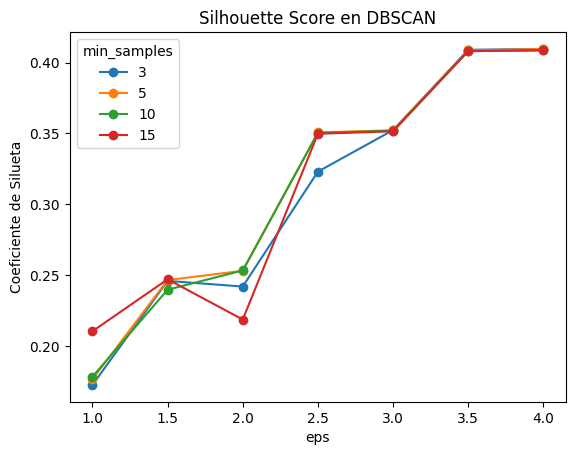

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

X = df_dbstd
eps_values = np.arange(1.0, 4.5, 0.5)
min_samples_values = [3, 5, 10, 15]

rows = []

for eps in eps_values:
    for min_samples in min_samples_values:
        print(f"Probando eps={eps}, min_samples={min_samples}")
        db = DBSCAN(eps=eps, min_samples=min_samples)
        labels = db.fit_predict(X)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        noise_ratio = (labels == -1).mean()
        sil = np.nan
        if n_clusters > 1:
            sil = silhouette_score(X, labels)
        rows.append({
        "eps": eps,
        "min_samples": min_samples,
        "n_clusters": n_clusters,
        "noise_ratio": noise_ratio,
        "silhouette": sil,
        })


results_df = pd.DataFrame(rows)
print("Resultados DBSCAN:")
print(results_df)


pivot_eps = results_df.pivot(index="eps", columns="min_samples", values="silhouette")
pivot_eps.plot(marker='o')
plt.title("Silhouette Score en DBSCAN")
plt.ylabel("Coeficiente de Silueta")
plt.xlabel("eps")
plt.show()

Dentro de estos resultados nos podremos a escoger la combinacion de epsilon y de min samples que nos de el mejor numero de silueta, esto con el fin de garantizar una buena separación de nuestros datos, lo cual nos lo informa la silueta, entre mayor sea esta, mejor separación va a haber en los datos del conjunto.

In [80]:
best_row = results_df.loc[results_df['silhouette'].idxmax()]
print("\n>>> Mejor combinación encontrada:")
print(best_row)


>>> Mejor combinación encontrada:
eps            4.000000
min_samples    3.000000
n_clusters     5.000000
noise_ratio    0.000868
silhouette     0.409592
Name: 24, dtype: float64


Ya con la mejor combinación encontrada, vamos a hacer nuestor modelo de DBScan siguiendo estos datos encontrados anteriormente

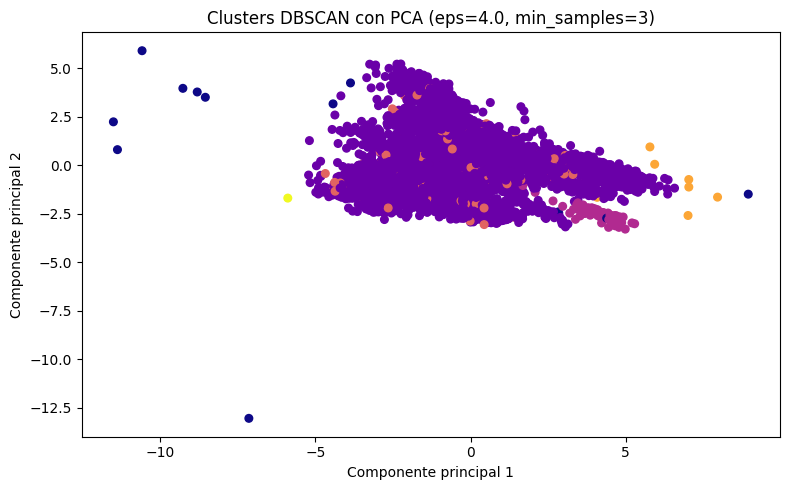

In [81]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.figure(figsize=(8,5))

example_eps = float(best_row['eps'])
example_min_samples = int(best_row['min_samples'])
db_example = DBSCAN(eps=example_eps, min_samples=example_min_samples)
labels_db = db_example.fit_predict(X)


plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_db, cmap='plasma', s=30)
plt.title(f"Clusters DBSCAN con PCA (eps={example_eps}, min_samples={example_min_samples})")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")


plt.tight_layout()
plt.show()

Finalmente vemos como estan distribuidos cada uno de los clusters dentro del modelo, con el fin de ver la division de los datos de nuestro dataset en distintos grupos.

In [82]:
unique, counts = np.unique(labels_db, return_counts=True)
for cluster, count in zip(unique, counts):
    if cluster == -1:
        print(f"Ruido: {count} puntos")
    else:
        print(f"Cluster {cluster}: {count} puntos")

Ruido: 12 puntos
Cluster 0: 13285 puntos
Cluster 1: 74 puntos
Cluster 2: 447 puntos
Cluster 3: 7 puntos
Cluster 4: 5 puntos


Ahora procedemos a hacer el mismo procedimiento pero usando los datos escalados por medio de MinMax

Probando eps=1.0, min_samples=3
Probando eps=1.0, min_samples=5
Probando eps=1.0, min_samples=10
Probando eps=1.0, min_samples=15
Probando eps=1.5, min_samples=3
Probando eps=1.5, min_samples=5
Probando eps=1.5, min_samples=10
Probando eps=1.5, min_samples=15
Probando eps=2.0, min_samples=3
Probando eps=2.0, min_samples=5
Probando eps=2.0, min_samples=10
Probando eps=2.0, min_samples=15
Probando eps=2.5, min_samples=3
Probando eps=2.5, min_samples=5
Probando eps=2.5, min_samples=10
Probando eps=2.5, min_samples=15
Probando eps=3.0, min_samples=3
Probando eps=3.0, min_samples=5
Probando eps=3.0, min_samples=10
Probando eps=3.0, min_samples=15
Probando eps=3.5, min_samples=3
Probando eps=3.5, min_samples=5
Probando eps=3.5, min_samples=10
Probando eps=3.5, min_samples=15
Probando eps=4.0, min_samples=3
Probando eps=4.0, min_samples=5
Probando eps=4.0, min_samples=10
Probando eps=4.0, min_samples=15
Resultados DBSCAN:
    eps  min_samples  n_clusters  noise_ratio  silhouette
0   1.0      

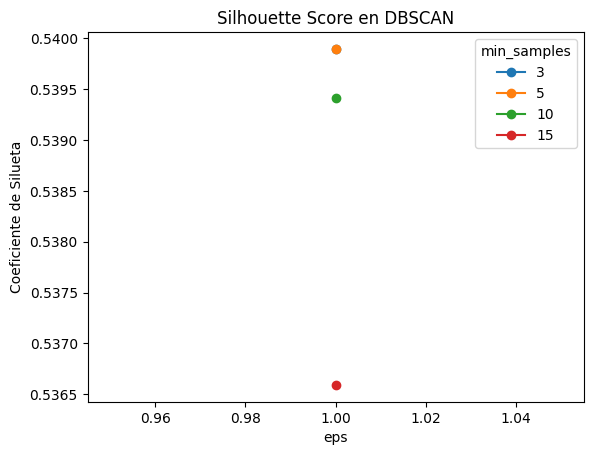

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

X = df_dbminmax
eps_values = np.arange(1.0, 4.5, 0.5)
min_samples_values = [3, 5, 10, 15]

rows = []

for eps in eps_values:
    for min_samples in min_samples_values:
        print(f"Probando eps={eps}, min_samples={min_samples}")
        db = DBSCAN(eps=eps, min_samples=min_samples)
        labels = db.fit_predict(X)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        noise_ratio = (labels == -1).mean()
        sil = np.nan
        if n_clusters > 1:
            sil = silhouette_score(X, labels)
        rows.append({
        "eps": eps,
        "min_samples": min_samples,
        "n_clusters": n_clusters,
        "noise_ratio": noise_ratio,
        "silhouette": sil,
        })


results_df = pd.DataFrame(rows)
print("Resultados DBSCAN:")
print(results_df)


pivot_eps = results_df.pivot(index="eps", columns="min_samples", values="silhouette")
pivot_eps.plot(marker='o')
plt.title("Silhouette Score en DBSCAN")
plt.ylabel("Coeficiente de Silueta")
plt.xlabel("eps")
plt.show()

In [84]:
best_row = results_df.loc[results_df['silhouette'].idxmax()]
print("\n>>> Mejor combinación encontrada:")
print(best_row)


>>> Mejor combinación encontrada:
eps             1.000000
min_samples     3.000000
n_clusters     16.000000
noise_ratio     0.000072
silhouette      0.539896
Name: 0, dtype: float64


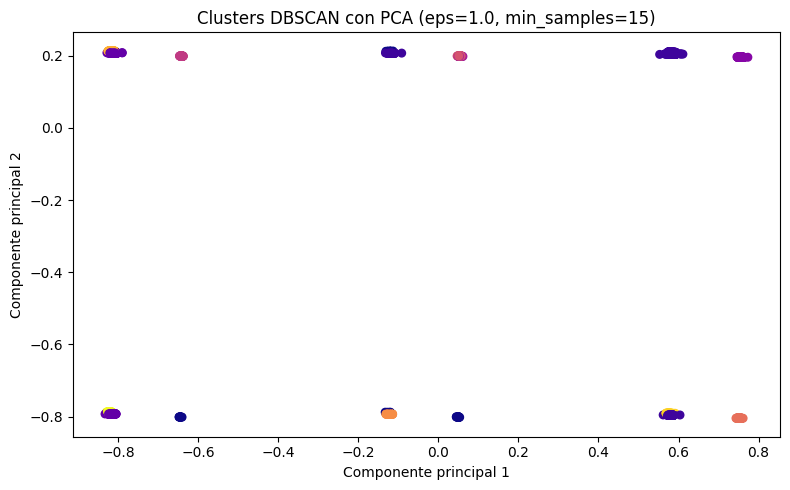

In [85]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.figure(figsize=(8,5))

example_eps = 1.0
example_min_samples = 15
db_example = DBSCAN(eps=example_eps, min_samples=example_min_samples)
labels_db = db_example.fit_predict(X)


plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_db, cmap='plasma', s=30)
plt.title(f"Clusters DBSCAN con PCA (eps={example_eps}, min_samples={example_min_samples})")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")


plt.tight_layout()
plt.show()

In [86]:
unique, counts = np.unique(labels_db, return_counts=True)
for cluster, count in zip(unique, counts):
    if cluster == -1:
        print(f"Ruido: {count} puntos")
    else:
        print(f"Cluster {cluster}: {count} puntos")

Ruido: 54 puntos
Cluster 0: 6393 puntos
Cluster 1: 5393 puntos
Cluster 2: 1166 puntos
Cluster 3: 52 puntos
Cluster 4: 59 puntos
Cluster 5: 61 puntos
Cluster 6: 315 puntos
Cluster 7: 100 puntos
Cluster 8: 159 puntos
Cluster 9: 40 puntos
Cluster 10: 38 puntos


## **Analisis de Resultados de DBScan**
Al hacer dos modelos sobre distintos tipos de estandarización podemos hacer un analisis de cual sirve mas con respecto a otro, por lo cual vamos a hacer el analisis en esta parte.
Primero observamos que el modelo con la estandarización estandar tiene 5 clusters dentro de si, con un ruido de 12 puntos y una silueta de 0.41, dando una silueta aceptable, pero por otro lado podemos decir que los datos estan desbalanceados, porque vemos un cluster en el que hay muchos datos concetrados, mientras que los demas son muy pequeños a comparación. Por otro lado, observamos el modelo resultante del df_minmax en el cual podemos ver que el algoritmo encontro 11 clusters con un ruido de 54 puntos pero vemos que posee un numero de silueta mas alta que el modelo anterior y tambien vemos que los datos estan mas balanceados, si bien hay dos o incluso tres clusters predominantes, los otros clusters se ven mas balanceados entre si, por lo cual el modelo que priorizamos usar en este caso es el modelo MinMax ya que tiene datos mas realistas y mejor divididos que el de la estandarizacion estandar.

## **Uso de IA Generativa**
En el apartado presente, el uso de IA generativa fue aplicado para mejorar la redacción, verificar coherencia y tambien arreglar errores de codigo que se presentaron durante el desarrollo de este.

# **Transformaciones necesarias para el modelo K-Means** (Johan Suarez)

Para poder usar el algoritmo de K-Means en el modelo a implementar, debido a que es basado en distancias, se necesitaría realizar un tratamiento especifico de los datos para que solo se usen variables numericas o por el contrario podamos transformalas a variables dummies. Esto ultimo se haría si el modelo no funciona bien solo con las variables numericas dejando por fuera las categorias.

In [87]:
df_kmeans = df.copy()

categoricas = ['RelacionAspecto', 'DefectoVisible', 'MétodoSecado']

df_kmeans = pd.get_dummies(df_kmeans, columns=categoricas, drop_first=False)

print("Dimensiones del df_kmeans:", df_kmeans.shape)
print(df_kmeans.info())
display(df_kmeans.head())

Dimensiones del df_kmeans: (13830, 18)
<class 'pandas.core.frame.DataFrame'>
Index: 13830 entries, 0 to 14290
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Area                         13830 non-null  int64  
 1   Perimetro                    13830 non-null  float64
 2   Excentricidad                13830 non-null  float64
 3   Medida                       13830 non-null  float64
 4   Solidez                      13830 non-null  float64
 5   Redondez                     13830 non-null  float64
 6   Compacidad                   13830 non-null  float64
 7   FactorForma2                 13830 non-null  float64
 8   FactorForma4                 13830 non-null  float64
 9   RelacionAspecto_Alargado     13830 non-null  boolean
 10  RelacionAspecto_Desconocido  13830 non-null  boolean
 11  RelacionAspecto_Redondeado   13830 non-null  boolean
 12  DefectoVisible_Desconocido   13830 non-n

,Area,Perimetro,Excentricidad,Medida,Solidez,Redondez,Compacidad,FactorForma2,FactorForma4,RelacionAspecto_Alargado,RelacionAspecto_Desconocido,RelacionAspecto_Redondeado,DefectoVisible_Desconocido,DefectoVisible_Normal,MétodoSecado_Desconocido,MétodoSecado_Honey,MétodoSecado_Lavado,MétodoSecado_Natural
0,50836,923618.0,0.764180,0.804762,0.983840,0.748853,0.709632,0.001103,0.995321,True,False,False,False,True,False,False,True,False
1,62764,1003767.0,0.764180,0.703995,0.978272,0.782807,0.690824,0.000916,0.984666,True,False,False,True,False,False,False,False,True
2,59965,994266.0,0.860886,0.661581,0.984485,0.762259,0.710159,0.001018,0.991211,True,False,False,False,True,False,False,False,True
3,55035,917.6,0.872446,0.799695,0.989998,0.821376,0.697811,0.001008,0.996380,True,False,False,False,True,False,False,True,False
4,39324,737773.0,0.685326,0.775392,0.989084,0.907867,0.852356,0.002174,0.997630,True,False,False,False,True,False,False,True,False


En la parte anterior, para garantizar que todas las variables se pudieran usar por el algoritmo, se convitieron las variables categoricas en variables dummy mediante one hot encoding. Esto nos dio como resultado un dataset totalmente numerico. 

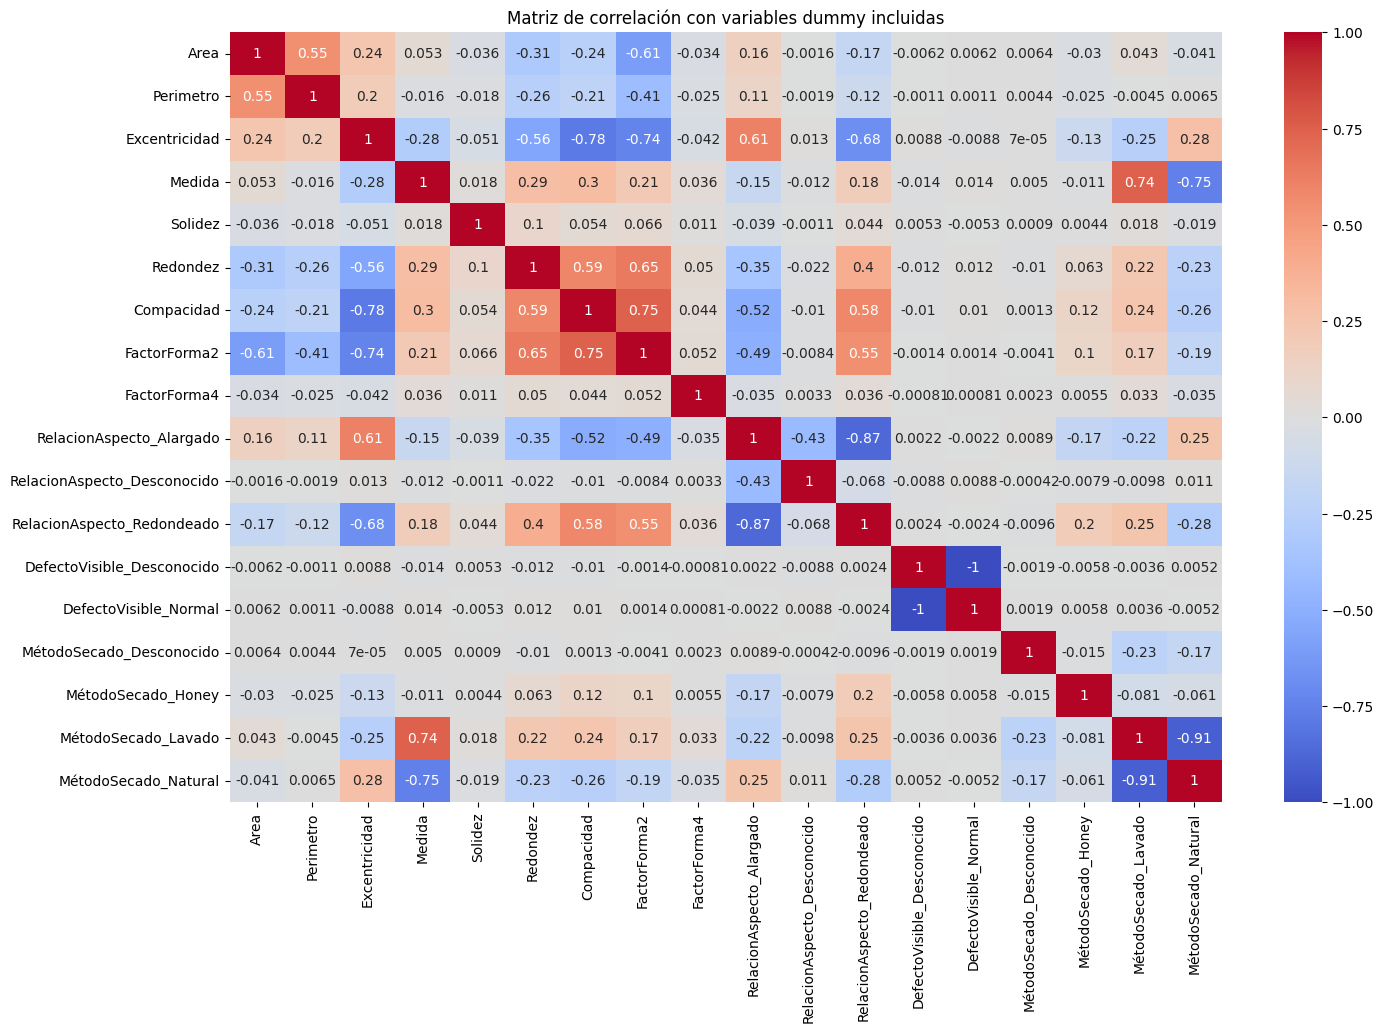

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df_kmeans.corr()

plt.figure(figsize=(16, 10))
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title("Matriz de correlación con variables dummy incluidas")
plt.show()


En esta parte, simplemente se volvió a analizar la correlacion entre todas las variables. Esto porque hay nuevas columnas, que aunque sean binarias, era importante revisar por si se encontraba una correlación extraña.

In [89]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

df_kmeans_scaled = df_kmeans.copy()

scaler = StandardScaler()

X_kmeans = scaler.fit_transform(df_kmeans_scaled)

X_kmeans = pd.DataFrame(X_kmeans, columns=df_kmeans_scaled.columns)

print("Dimensiones de X_kmeans:", X_kmeans.shape)
display(X_kmeans.head())


Dimensiones de X_kmeans: (13830, 18)


,Area,Perimetro,Excentricidad,Medida,Solidez,Redondez,Compacidad,FactorForma2,FactorForma4,RelacionAspecto_Alargado,RelacionAspecto_Desconocido,RelacionAspecto_Redondeado,DefectoVisible_Desconocido,DefectoVisible_Normal,MétodoSecado_Desconocido,MétodoSecado_Honey,MétodoSecado_Lavado,MétodoSecado_Natural
0,-0.073455,0.486036,0.140083,1.084752,-0.131038,-2.139705,-1.356002,-1.054303,0.023049,0.427385,-0.182969,-0.372856,-0.507446,0.507446,-0.20581,-0.073841,0.914688,-0.832707
1,0.333805,0.742677,0.140083,-0.900158,-0.361607,-1.561763,-1.640132,-1.378745,-0.256805,0.427385,-0.182969,-0.372856,1.970653,-1.970653,-0.20581,-0.073841,-1.093269,1.200903
2,0.238238,0.712254,1.131866,-1.735649,-0.104317,-1.911516,-1.348043,-1.201910,-0.084899,0.427385,-0.182969,-0.372856,-0.507446,0.507446,-0.20581,-0.073841,-1.093269,1.200903
3,0.069912,-2.468488,1.250422,0.984942,0.123991,-0.905268,-1.534571,-1.218981,0.050854,0.427385,-0.182969,-0.372856,-0.507446,0.507446,-0.20581,-0.073841,0.914688,-0.832707
4,-0.466511,-0.109047,-0.668614,0.506220,0.086123,0.566912,0.800073,0.800612,0.083696,0.427385,-0.182969,-0.372856,-0.507446,0.507446,-0.20581,-0.073841,0.914688,-0.832707


De nuevo, como K-Means se basa en distancias euclidianas, necesitabamos escalar las variables. Esto ya que por ejemplo, variables como Area y Perimetro podrían generar resultados extraños en el calculo de las distancias al ser mas dominantes/mayores que las variables dummies. En esta transformacion cada variable tiene media de 0 y desviación estándar de 1 usando StandarScaler.

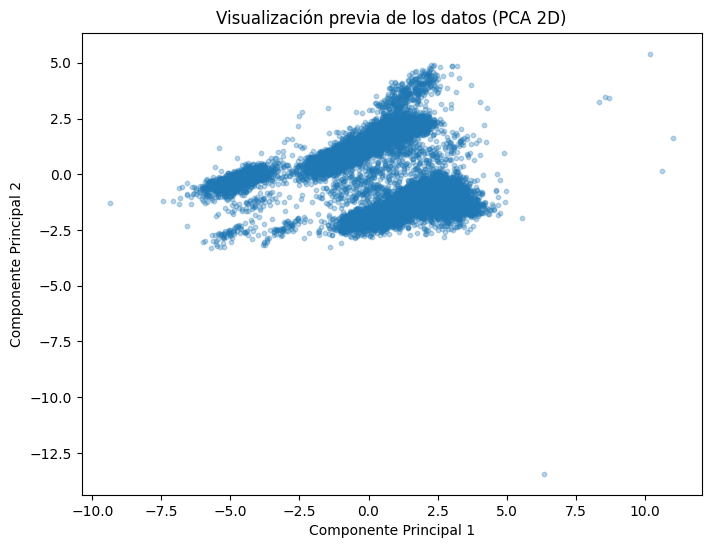

In [90]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_kmeans)

pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.3, s=10)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("Visualización previa de los datos (PCA 2D)")
plt.show()


Aqui se hizo una visualización previa de como se agrupan los datos aproximadamente. Esto se hizo con el objetivo de quizas poder ver una idea de la cantidad de clusters que podrian haber luego de implementar el modelo.

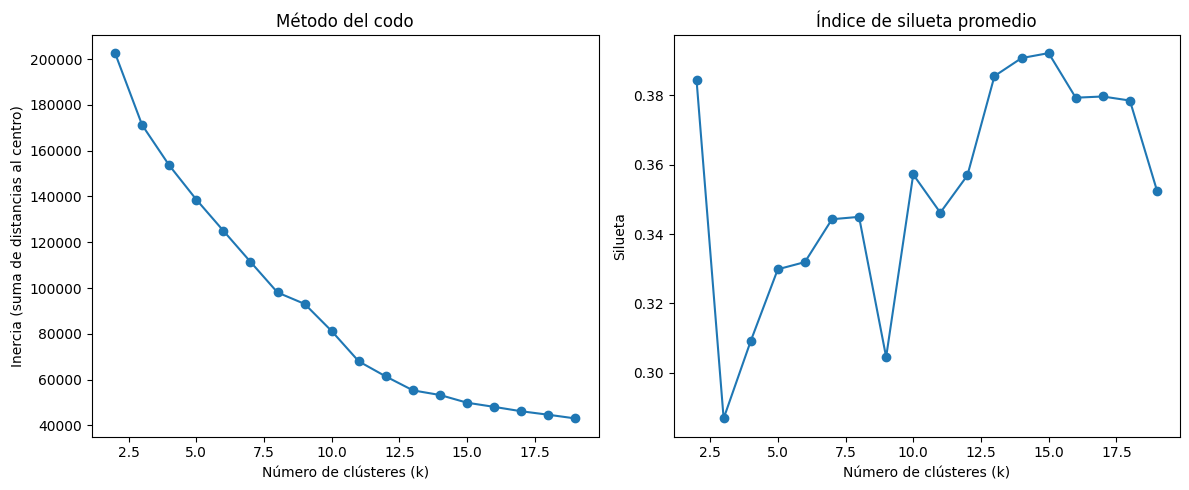

,k,inercia,silueta
0,2,202591.371033,0.384300
1,3,171175.169029,0.286897
2,4,153586.894005,0.309172
3,5,138647.853601,0.329844
4,6,125013.753952,0.331916
5,7,111451.841352,0.344256
6,8,98063.605722,0.344937
7,9,93077.317790,0.304577
8,10,81203.738124,0.357139
9,11,67984.250778,0.346148


Mejor k por silueta: 15


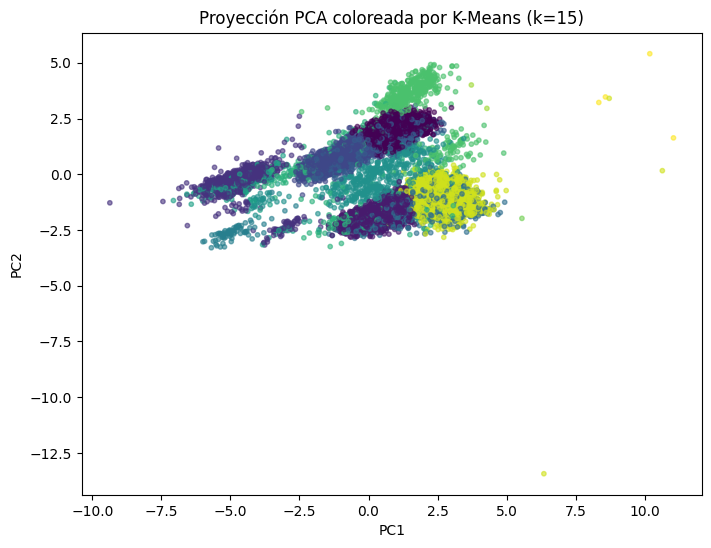

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

k_range = range(2, 20)

inertias = []
sil_scores = []

max_sil_samples = 6000
sil_idx = (np.random.RandomState(42)
           .choice(len(X_kmeans), size=min(len(X_kmeans), max_sil_samples), replace=False))

for k in k_range:
    km = KMeans(n_clusters=k, n_init=20, random_state=42)
    labels = km.fit_predict(X_kmeans)
    inertias.append(km.inertia_)
    
    try:
        sil = silhouette_score(X_kmeans.iloc[sil_idx] if hasattr(X_kmeans, "iloc") else X_kmeans[sil_idx],
                               labels[sil_idx])
    except Exception:
        sil = silhouette_score(X_kmeans, labels)
    sil_scores.append(sil)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].plot(list(k_range), inertias, marker='o')
ax[0].set_title("Método del codo")
ax[0].set_xlabel("Número de clústeres (k)")
ax[0].set_ylabel("Inercia (suma de distancias al centro)")

ax[1].plot(list(k_range), sil_scores, marker='o')
ax[1].set_title("Índice de silueta promedio")
ax[1].set_xlabel("Número de clústeres (k)")
ax[1].set_ylabel("Silueta")

plt.tight_layout()
plt.show()

res = pd.DataFrame({"k": list(k_range), "inercia": inertias, "silueta": sil_scores})
display(res)

k_best = int(res.loc[res["silueta"].idxmax(), "k"])
print(f"Mejor k por silueta: {k_best}")

km_best = KMeans(n_clusters=k_best, n_init=20, random_state=42)
labels_best = km_best.fit_predict(X_kmeans)

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_kmeans)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_best, s=10, alpha=0.6)
plt.title(f"Proyección PCA coloreada por K-Means (k={k_best})")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.show()


A partir del metodo del codo, que quizas no sea muy concluyente, y con el indice de la silueta, nos dimos cuenta que la reducción de la inercia se estabiliza aproximadamente entre k = 15 y 16, y el indice de la silueta toma un maximo en k = 16. Esto indica una buena separación de grupos, por lo que se decidió usar k = 16 para el modelo.

In [92]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

k_final = 16
km_final = KMeans(n_clusters=k_final, n_init=20, random_state=42)
labels = km_final.fit_predict(X_kmeans)

cluster_counts = pd.Series(labels).value_counts().sort_index()
print("Tamaños clusteres:")
print(cluster_counts)

_, dists = pairwise_distances_argmin_min(X_kmeans, km_final.cluster_centers_)

max_dist = dists.max()
confianza = 1 - (dists / max_dist)

df_conf = pd.DataFrame({"cluster": labels, "confianza": confianza})

cluster_conf_stats = df_conf.groupby("cluster")["confianza"].agg(['mean','median','min','max'])
print(cluster_conf_stats)


Tamaños clusteres:
0     2071
1     1105
2     1671
3     1248
4        5
5      826
6       75
7     2270
8     1304
9      447
10     451
11    1097
12       2
13     510
14     411
15     337
Name: count, dtype: int64
             mean    median       min       max
cluster                                        
0        0.961364  0.966966  0.854216  0.991016
1        0.940997  0.943560  0.762669  0.991345
2        0.956070  0.957423  0.753493  0.993229
3        0.948352  0.963039  0.451698  0.988277
4        0.921384  0.906780  0.868950  0.972291
5        0.941316  0.956130  0.000000  0.987823
6        0.935625  0.944606  0.780765  0.975445
7        0.966832  0.968838  0.870485  0.995047
8        0.953883  0.958263  0.801537  0.990128
9        0.891009  0.897443  0.772389  0.945963
10       0.919772  0.929398  0.795767  0.967020
11       0.935811  0.938713  0.805031  0.988375
12       0.936109  0.936109  0.936109  0.936109
13       0.909049  0.917162  0.794595  0.970546
14       0.

Aqui se calcularon los tamaños de cada cluster para verificar su nivel de representación y se obtuvo una medida basada en la distancia de cada punto a su centroide. Estos resultados muestran que los clusteres tienen tamaños equilibrados en su mayoría y que los valores de las maedidas en promedio son cercanas a 0, lo que nos deja ver que la mayoría de puntos estan bien asignados a su cluster mas cercano.

# **Análisis de resultados K-Means**

Esta implementación de K-Means con k = 16 nos dejó identificar clusters que estaban diferenciados adecuadamente respecto a los granos de café. Esto hizo que se logrará un indice de silueta de 0.40 aproximadamente, lo que nos muestra una separación adecuada entre los clusteres. La visualización en el espacio PCA muestra que los clusteres son compactos en su mayoria y que estan relativamente balanceados. Como conclusión, este analisis ofreció una buena base para caracterizar los granos de cafe segun su morfología.

# **Uso de IA**

Se uso IA para generar graficas mucho mejores visualmente hablando. Tambien para que los resultados se vieran mas organizados.

# **Mejor Algoritmo**

Para elegir el mejor modelo tuvimos en cuenta dos cosas, qué tan bien formaba los grupos y qué tan útiles eran esos grupos para la empresa. DBSCAN tuvo problemas porque en la mayoría de casos creó demasiados microgrupos o incluso un único cluster, lo cual no es práctico para un proceso productivo que necesita trazabilidad clara. K-Means logró separar bien los datos en términos matemáticos, pero sus resultados no ayudaban tanto a explicar aspectos clave como el método de secado o los defectos visibles en los granos. Por otro lado, GMM ofreció un balance más adecuado, después de eliminar micro-clusters muy pequeños, quedaron siete grupos principales con altos niveles de confianza en las asignaciones. Estos grupos no solo son consistentes, sino que también reflejan diferencias importantes en atributos directamente relacionados con el negocio. Por eso, GMM se considera la mejor opción, ya que combina buena calidad en los agrupamientos con información práctica para mejorar el control de calidad y la trazabilidad de los granos.

# **Respuesta a las preguntas**

1. ¿Qué criterios son importantes para la selección del modelo?
Se deben considerar la calidad de los agrupamientos, la estabilidad del modelo, y sobre todo su utilidad práctica para el negocio, es decir, que los clusters permitan interpretar y tomar decisiones concretas.

2. ¿Cómo medir la calidad del modelo construido? ¿Cómo saber que el modelo construido tiene una buena calidad?
Se usan métricas como el índice silhouette para evaluar la separación entre clusters y criterios como BIC/AIC para medir el ajuste del modelo. Además, un buen modelo debe generar agrupamientos válidos con las variables relevantes para la empresa, donde la cantidad de valores por cada cluster está más o menos balanceada y presenta resultados coherentes. 

3. ¿Qué retos tienen estos modelos no supervisados, si se quisieran aplicar a nivel profesional?
El principal reto es garantizar estabilidad al incorporar nuevos datos, evitar la creación de clusters poco representativos o con valores muy pequeños por el agrupamiento, y lograr que los resultados se integren de forma útil en los sistemas de producción y control de calidad.

4. ¿Cómo varía la calidad de la solución obtenida si se aplican diferentes algoritmos?
Cada algoritmo ofrece una perspectiva distinta: DBSCAN detecta bien grupos irregulares pero puede crear demasiado ruido, K-Means separa bien en forma geométrica pero con menos valor interpretativo, y GMM ofrece mayor balance entre calidad estadística y utilidad práctica en este caso.

# **Presentación Canvas**
https://www.canva.com/design/DAG0aBj9b2s/QMa3f4rDttNo3gich01z5g/edit?utm_content=DAG0aBj9b2s&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton